# Objective - Is to develop a model for product rating prediction based on data scraped from e-retailers website for various products

# Part -2 Machine Learning Model Development

In [1]:
# Import warning
import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [2]:
df_1 = pd.read_csv('amazon_laptop.csv')
df_2 = pd.read_csv('amazon_phone.csv')
df_3 = pd.read_csv('amazon_headphones.csv')
df_4 = pd.read_csv('amazon_watches.csv')
df_5 = pd.read_csv('amazon_procam.csv')
df_6 = pd.read_csv('amazon_ monitors.csv')
df_7 = pd.read_csv('amazon_Printers.csv')
df_8 = pd.read_csv('amazon_Home theater.csv')
df_9 = pd.read_csv('amazon_router.csv')
df_10 = pd.read_csv('flip_phones.csv')
df_11 = pd.read_csv('flip_laptops.csv')
df_12 = pd.read_csv('flip_headphones.csv')
df_13 = pd.read_csv('laptop_rating.csv')
df_14 = pd.read_csv('laptop_rating.csv')
df_15 = pd.read_csv('phone_data.csv')
df_16 = pd.read_csv('headphone_data.csv')
df_17 = pd.read_csv('smartwatch_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Performing EDA

In [3]:
df_1 = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17], axis =0, ignore_index = True)
df = df_1.copy()
df.drop('Short_Desc',axis=1,inplace=True)
df['len']= df['Desc'].str.len()# lenth of each string

<IPython.core.display.Javascript object>

In [4]:
df.head(10)

Unnamed: 0                                               Desc  Rating  \
0           0    Okay! Let me get straight into the Teardown ...       5   
1           1    Pros1) Upgradability.Western Digital SSD ins...       5   
2           2    Bought this lappy @37k with exchange of my 9...       5   
3           3    Ryzen 5 4500u is fast and power efficient mu...       5   
4           4    The laptop is great, but the seller is inten...       1   
5           5    This laptop is amazing at this price range a...       3   
6           6                                                NaN       1   
7           7    Superfast Booting and Long battery life, I u...       5   
8           8    Pros-SturdyFast connectivityFast processingQ...       4   
9           9    Great all-round performance. So let me start...       5   

      len  
0  3148.0  
1  1633.0  
2   548.0  
3   625.0  
4   312.0  
5   948.0  
6     NaN  
7  1058.0  
8  1422.0  
9  2484.0

In [5]:
df.tail(10)

Unnamed: 0                                               Desc  Rating  \
88109        6315  Amazon Customer3.0 out of 5 starsNot greatRevi...       3   
88110        6316  Amazon Customer5.0 out of 5 starsAmazed by wat...       5   
88111        6317  Amit Yadava5.0 out of 5 starsQuality product a...       5   
88112        6318  Rakesh Kumar1.0 out of 5 starsTagg is big scam...       1   
88113        6319  Amazon Customer5.0 out of 5 starsThere is a ne...       5   
88114        6320  Aayush Bhowmick5.0 out of 5 starsExcellent per...       5   
88115        6321  SirajMoossa 5.0 out of 5 starsValue for money....       5   
88116        6322  Debashis B.3.0 out of 5 starsSturdy look and b...       3   
88117        6323  Christopher David1.0 out of 5 starsDont waste ...       1   
88118        6324  Vinu Xavier5.0 out of 5 starsReally worth...ma...       5   

          len  
88109   428.0  
88110   577.0  
88111  2255.0  
88112   569.0  
88113   728.0  
88114  1908.0  
88115   615.0  
88116   748.0  
88117   447.0  
88118  1237.0

Unnamed: 0 can be dropped

In [6]:
df.shape # Dataset shape i.e 88119 observation in 4 features

(88119, 4)

In [7]:
df['Rating'].value_counts() # Different value count in Label

5              35545
1              27586
4              12407
3               7379
2               4606
72               149
1234565           92
214               60
71                50
3111              50
123               35
11                20
714               20
423               20
7865              20
81                20
15                10
12                10
1115              10
2024              10
89263845355       10
881               10
Name: Rating, dtype: int64

1. Data with only 1-5 rating has to be retained

In [8]:
# Converting all in lower case
df['Desc'] = df['Desc'].str.lower()

In [9]:
df.isnull().sum() # Checking for null values

Unnamed: 0       0
Desc          1000
Rating           0
len           1000
dtype: int64

In [10]:
df.info() # Checking data type and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88119 entries, 0 to 88118
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88119 non-null  int64  
 1   Desc        87119 non-null  object 
 2   Rating      88119 non-null  int64  
 3   len         87119 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ MB


We can see that the Rating(Label) column is in int format & Desc is in object format

In [11]:
# Droping Nan values & Retaining only required ratings in dataset
df.dropna(inplace=True) # drop all null values
df_f=df.loc[(df.Rating)==5]
df_fo=df.loc[(df.Rating)==4]
df_t=df.loc[(df.Rating)==3]
df_o=df.loc[(df.Rating)==1]
df_tw=df.loc[(df.Rating)==2]
df = pd.concat([df_o,df_tw,df_t,df_fo,df_f], axis =0, ignore_index = True)
df

<IPython.core.display.Javascript object>

Unnamed: 0                                               Desc  Rating  \
0               4    the laptop is great, but the seller is inten...       1   
1              15    super slow laptop. don't buy this laptop. it...       1   
2              24    worst service from amazon and the seller. af...       1   
3              27    this is very bad product from amazon there i...       1   
4              28                                      sound problem       1   
...           ...                                                ...     ...   
86538        6317  amit yadava5.0 out of 5 starsquality product a...       5   
86539        6319  amazon customer5.0 out of 5 starsthere is a ne...       5   
86540        6320  aayush bhowmick5.0 out of 5 starsexcellent per...       5   
86541        6321  sirajmoossa 5.0 out of 5 starsvalue for money....       5   
86542        6324  vinu xavier5.0 out of 5 starsreally worth...ma...       5   

          len  
0       312.0  
1       202.0  
2       405.0  
3       138.0  
4        15.0  
...       ...  
86538  2255.0  
86539   728.0  
86540  1908.0  
86541   615.0  
86542  1237.0  

[86543 rows x 4 columns]

5    34975
1    27326
4    12317
3     7339
2     4586
Name: Rating, dtype: int64


<AxesSubplot:>

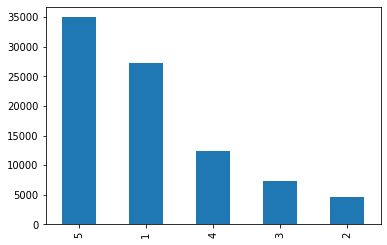

In [12]:
# Confirming observations with required ratings 
print(df['Rating'].value_counts())
df['Rating'].value_counts().plot(kind ='bar')

# Data Cleaning

In [13]:
df['Desc']= df['Desc'].str.split('stars').str[-1].str.strip() # Retaining comments post stars keyword

In [14]:
df['Desc'] = df['Desc'].str.replace(r'^.+@[^\.]\.[a-z]{z,}$' , " ") # Removing any email symbols
df['Desc'] = df['Desc'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$' , " ") # Removing any website symbols
df['Desc'] = df['Desc'].str.replace(r'\u20B9|\$' , " ") # Removing any currency symbols
df['Desc'] = df['Desc'].str.replace(r'\d+(\.\d+)?' , " ") # Removing any digits symbols
df['Desc'] = df['Desc'].str.replace(r'[^\w\d\s]' , " ") # Removing any punctuations
df['Desc'] = df['Desc'].str.replace(r'\s+' , " ") # Removing any whitespaces
#df['Desc'] = df['Desc'].str.replace(r'^\s+|\s+?$' , " ") # Removing any leading & trailing white spaces

In [15]:
# Lemetizing column and rejoing it as a string
import nltk
from nltk.tokenize import sent_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Desc):
    return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Desc)]


df['lemm_desc'] = df.Desc.apply(lemmatize_text)


df['lemm_desc'] = [' '.join(map(str, l)) for l in df['lemm_desc']]

df

Unnamed: 0                                               Desc  Rating  \
0               4  the laptop is great but the seller is intentio...       1   
1              15  super slow laptop don t buy this laptop it tak...       1   
2              24  worst service from amazon and the seller after...       1   
3              27  this is very bad product from amazon there is ...       1   
4              28                                      sound problem       1   
...           ...                                                ...     ...   
86538        6317  quality product and worth the costreviewed in ...       5   
86539        6319  there is a new brand in town really goodreview...       5   
86540        6320  excellent performance by aayush bhowmick on oc...       5   
86541        6321  value for money nice watchreviewed in india on...       5   
86542        6324  really worth may be more worth for what you pa...       5   

          len                                          lemm_desc  
0       312.0  the laptop is great but the seller is intentio...  
1       202.0  super slow laptop don t buy this laptop it tak...  
2       405.0  worst service from amazon and the seller after...  
3       138.0  this is very bad product from amazon there is ...  
4        15.0                                      sound problem  
...       ...                                                ...  
86538  2255.0  quality product and worth the costreviewed in ...  
86539   728.0  there is a new brand in town really goodreview...  
86540  1908.0  excellent performance by aayush bhowmick on oc...  
86541   615.0  value for money nice watchreviewed in india on...  
86542  1237.0  really worth may be more worth for what you pa...  

[86543 rows x 5 columns]

In [25]:
stplist = ['slowreviewed','wonderfula', 'wonderfulbest', 'wonderfulcheap', 'wonderfulfirst', 'wonderfulgood', 'wonderfulgreat', 'wonderfulhi', 'wonderfuli', 'wonderfulin', 'wonderfulit', 'wonderfuljust', 'wonderfulnice', 'wonderfulrealme', 'wonderfulsuperb', 'wonderfulthanks', 'wonderfulthanksread', 'wonderfulthese', 'wonderfulthis', 'wonderfulthnkq', 'wonderfulthree', 'wonderfulvery', 'wonderfulwowwww', 'wondering', 'wont', 'woow', 'wordsreviewed','wobbling', 'woww','wobling', 'woffers', 'woke', 'wolf', 'wollen','wonder','zillion', 'zoho', 'zone', 'zoom', 'zoomsuper', 'zustzlich', 'zx','verified','amazonreviewed','fantasy','later','purchase','seen','tech','excellentbackside','goodnot','fastbattery','fantasy','buyreviewed',
'ad','lot','thisreviewed','model','averagemobile','overallreviewed','appreciatedcamera','productreviewed','try','please','blackverified','helpfulreport', 'commentsthere','bluestyle','name','gbstyle','whitesize','storageverified','blueverified','blackverified'
'offerpatter','offerpattern','storagecolour','people','blacksize','printsfor','goodtoo','may','blackstyle','rangereviewed'
,'ace','whitesize','absorbing','mark','many','advertisement','greyverified','much','one','note','pro','bluesize',
'megapixelreviewed','orangeverified','comment','right','refresh','funtouch','writing','review','averageone', 'averagereviewed', 'averified', 'avicertified', 'avijit', 'avinash', 'aviral','acha', 'achchi', 'ache','actuality','adequateread','airdopes','airdopsread','alas', 'alavalacertified','aayenge','aayush','abdelrahman','abdelsalam','abdul','abdulcertified','abdulvahid','abhay','abhinav',
'abhishek','abovei', 'abuseshowing','abusetranslate','accordingg','acertified','acharyacertified','activecolour',
'adakcertified','adaptori', 'adidas','adil','adithyanath','adra','afee','aftern','againreviewed','agrawal',
'ahluwaliacertified','ahmadcertified','ahmecertified','ahmedabadfeb','ahmedabadjun','ahmedcertified', 'ajay','ajit',
'akhilesh','akkenacertified','akola', 'akshansh','alamcertified','alappuzhafeb','alaways','alcantara','alcantarapros',
'alllreviewed','alok', 'ama','amardeep','__________________________________at','_good','_overpricedbattery','aaaaaaaaaaaaaaaaaaaaaaaa','aaquibcertified',
           'aashik','aata','wa','abot','abs','absolut','absoluter','abstractotech','abt','ac','acc','accuracyhard','acer',
           'aching','activiy','actuve','adf','adjustmentconsidering','ado','af','afte','al','alexa','algorithm','alienware',
           'although','altogether','amd','ameoled','america','amoled','amozon','amp','ampere','amphan','amplification',
           'amplifier','amplifies','analog','annd','anschlüsse','ansprüche','ant','antena','antenas','antenna','antennae',
           'antennas','antina','apartment','aperture','aperture','apps','architecture','artis', 'attenuation','attestation',
           'attire','attitudesony','auflösung','autoscan','autosync','aux','avarage','avrage','awesomely','awsm','aíslan',
           'backgrounnd','backlight','backlighting','backpack','backpacker','backside','backwards','badnot','badoverall',
           'baggage','bahut','bainocular','bakwaz','balancer','banding','bands','bass', 'beautifully','beautifuly','becaz',
           'für','fürkinder','________________________________updating', '_advanced_','_expected_','_may_','_newupdate',
           'abhängig','', 'abhngig', 'a', 'aa', 'aaa', 'aac', 'aati', 'ab', 'aber', 'abhngig', 'abhorring','abo','adjustno',
           'admits','adsl','problem',
           'agilan','ai', 'ain', 'airtel', 'airtele', 'airtelztemf', 'airtight', 'airtime', 'aka', 'akg', 'akshay', 
           'aktel','albeit', 'alco','alg','alle','allem','allen','alles', 'alllooks','allperfectly','alongsideabsence',
           'als','alsotest','alternativen','alternativesif', 'alwahs','amazfit','amazinglight', 'amazon', 'amazonall', 
           'amazonbasics', 'amazone', 'amazoni', 'amazons', 'amazonthis', 'amazonvery','among','anbietern', 'anc', 
           'andbon', 'andcustomer', 'andd', 'anderen', 'android', 'androidoverall', 'anfangs', 'angenehmer', 'angenehmes', 
           'angeschafft', 'angewiesen', 'anheben', 'anirudh', 'anpressdruck', 'anschlsse', 'ansprche','antiglare', 'any',
           'anybody', 'anymore', 'anyone', 'anything', 'anythings', 'anytime', 'anyway', 'anyways', 'anywhere', 'ao', 
           'aoc', 'aopen', 'ap', 'apn', 'app', 'apparatus', 'apparently', 'appario', 'appeal', 'appealing','approxand',
           'approxly', 'appsamazing', 'appscons', 'appsfree', 'appssamsung', 'apptest', 'apr', 'april', 'apsc', 'apt',
           'aptitude', 'apu', 'arc', 'archer', 'arching', 'ardent', 'are', 'area', 'areas', 'arefull', 'aren', 'argue',
           'arm', 'armour', 'arms', 'aroud', 'around', 'aroundtouchscreen', 'arramnge', 'arrange', 'arranged',
           'arrangement', 'arranging', 'array', 'arretierung', 'arrival', 'arrive', 'arrived', 'arrives', 'arrogant',
           'arrow', 'arrows', 'art', 'article', 'arunachal', 'as', 'asap', 'ascertained', 'asian', 'ask', 'asked',
           'asking', 'asks', 'aslan', 'aslo', 'aspect', 'aspects', 'asphalt', 'aspiration', 'aspire', 'assassin',
           'assemble', 'assembled', 'assembling', 'assembly', 'assess', 'assets', 'assigned', 'assignments', 'assistance',
           'assistant', 'assisted', 'assit', 'associated','astounding', 'asus', 'aswell', 'asymmetric', 'at', 'atc',
           'ate', 'ath', 'atharv', 'athlete', 'atlast', 'atlest', 'atm', 'atmos', 'au', 'auch', 'aud','audiblethis',
           'audioenthusiasten', 'audiono', 'audiophil', 'audiophile', 'audiophiles', 'audioyes', 'auf', 'auflistung',
           'auflsung', 'aufsitzen', 'aug', 'august', 'aun', 'aunts', 'aur', 'aura', 'aus', 'ausgeben', 'ausgeglichen',
           'ausgelegt', 'quality','ausgewogenes', 'ausreichend', 'aussome', 'ausspielen','autocad', 'autofocus', 'automaticaly',
           'av', 'avail', 'avaragebut', 'avashyakta', 'avataristic', 'averag','avg','avita','awesomehighly', 'awesomeit',
           'awesomepros', 'awesomethings', 'awful', 'awkward', 'awsome', 'awsomefor', 'ax', 'axis', 'azuz', 'b', 'bacause',
           'bachchan', 'backbut', 'backcase', 'backend', 'backlit', 'backnot','backupbasscan', 'backworst', 'baclight',
           'badalthough', 'badminton', 'bandwidth', 'bang', 'bangalore', 'banging', 'bank', 'banks','barnacules', 
           'bassaffinen', 'basshead', 'bassheads', 'bassinbuilt', 'bassmy', 'bassok', 'baterary', 'bathing', 'bathroom',
           'batman', 'batmobile', 'baton', 'batter', 'batteries', 'batterieswhat', 'batterry', 'battery', 'batterybelieve',
           'battle', 'battries', 'battry', 'baught', 'bauweise', 'bay', 'bazel', 'bcoz', 'bcz', 'bdv', 'be', 'beacause',
           'beacuse', 'beam', 'beamforming', 'bear', 'beeb', 'been', 'beeping', 'behringer', 'bei','beispiel', 'beleive',
           'believe', 'believed', 'belive', 'belkin', 'ben', 'bengal', 'benq', 'benutze', 'benutzung', 'ber',
           'beraudiophil', 'berbetonter', 'berbetonung', 'bereits', 'bereut', 'bertnt', 'bery', 'besser','betroffenvon',
           'betternothing', 'beurteilen', 'bewirbt', 'beyerdynamic', 'bezel', 'bezels', 'bezelsless', 'bezzeless',
           'bezzels', 'bezzles', 'bg', 'bh', 'bhatnagar', 'bhi', 'bhk', 'bien', 'bietet', 'bigeener', 'bigspy', 'binder',
           'binding', 'binge', 'binocular', 'binoculars', 'bio', 'bios', 'bip', 'bird', 'birds', 'birthday', 'bis',
           'bislang', 'bit', 'biting', 'bitrate', 'bitte', 'bitter', 'bixby', 'bk', 'bla', 'blabk', 'black', 'blackdesign',
           'blak', 'blaupunkt', 'ble', 'bleading', 'bleak', 'bleed', 'bleeding', 'bleedingedit', 'bleeds', 'blend', 'bless',
           'blessing', 'blew', 'blind', 'blinding', 'blindly', 'blindsided', 'blink', 'blinking', 'bliss', 'blk', 'bloat',
           'bloatware', 'bloatwares', 'block', 'blocked', 'blocks', 'blog', 'blogging', 'blogs', 'blood', 'blooms', 'blot',
           'blotched', 'blower', 'blowing', 'blows', 'blu', 'bluerigger', 'bluestack', 'bluetooh', 'bluetoothf', 'blurring',
           'blurry', 'bmp', 'bnw', 'boasts', 'boltt', 'bookmyshow', 'bootimpressive', 'booting', 'boots', 'border', 
           'borderlands', 'borderless', 'borders', 'bored', 'borosil', 'bothersome', 'bougjt', 'boult', 'boultaudio',
           'bout', 'box', 'boxed', 'boxedit', 'boxes', 'boxesbest', 'boxing', 'boxpanel', 'boy', 'boys', 'bp', 'bpc',
           'bpm', 'bracket', 'brag', 'braided', 'brandsbut', 'brandsm', 'bravia', 'breathing', 'breeze', 'brezel',
           'bribing', 'brick', 'bridge','bhowmick','bridging', 'brightnesslimited', 'brillentrger', 'brilliantthe', 'brillint',
           'brimga','bringing', 'brings', 'bristles', 'britness', 'bro', 'broad', 'broadband', 'broadcasting', 'broader',
           'brocher', 'brother', 'brothers', 'bsnl', 'bsse', 'bt', 'btrucf', 'btw', 'bubble', 'bubbles', 'buck', 'buckle',
           'bucks', 'bud', 'budding', 'budget', 'buds', 'buen', 'buenos', 'buff', 'buffering', 'buffs', 'bug', 'buggy',
           'bulbs', 'buletooth', 'bulge', 'bulk', 'bulky', 'bulkyi' , 'bullshitm', 'bummer', 'bushnell', 'busted', 'but',
           'butcost', 'buti', 'butmost', 'butoverall', 'butt', 'butter', 'buttery', 'button', 'buttondeep', 'buttons',
           'buyikall', 'buys', 'buysee', 'buzzer', 'buzzing', 'bw', 'by', 'bye', 'byte', 'bytes', 'c', 'ca', 'cab',
           'cabal', 'cabin', 'cabinet', 'cabinets', 'cable', 'cables', 'cabs', 'cache', 'cad', 'cadence', 'cage', 'cahrged',
           'cakewalk', 'caking', 'calculate', 'calculates', 'calculating', 'calculation', 'calculator', 'calculted', 'calendar',
           'caliberating', 'calibrate', 'calibrated', 'calibration', 'calibrations', 'calidad', 'called', 'callers', 'callingsleep',
           'callsa', 'calm', 'calming', 'cambium', 'came', 'camera', 'cameraits', 'cameras', 'cams', 'can', 'canada',
           'cancellationcons','costreviewed','goodreviewed','watchreviewed', 'cancellationgreat', 'cancelled', 'capablepros', 'capped', 'caps', 'capsule', 'capture', 'captured',
           'captures', 'capturing', 'car', 'carbon', 'card', 'cardboard', 'cards', 'cardso', 'care', 'careful', 'carefully', 'cares',
           'carger', 'carrier', 'carry', 'carrycons', 'carrying', 'cartages', 'cartarage', 'cartiges', 'cartigesboth', 'cartilage',
           'carting', 'cartirage', 'carton', 'cartridge', 'cartridges', 'cascos', 'caseso', 'caseusb', 'catridge', 'catridges', 'caz',
           'cc', 'cctv', 'cctvvga', 'cd', 'ceelstron', 'ceiling', 'celeron', 'cell', 'cellular', 'cemera', 'censor', 'censors', 'cent',
           'center', 'centers','overallreviewed','white','everreviewed' 'central', 'centre', 'centres', 'centric', 'ceo', 'certain', 'certainly', 'certified', 'cg', 'ch',
           'chages', 'chained', 'chair', 'chaiye', 'chakan', 'challengeno', 'chamchas', 'channel', 'channels', 'chap', 'characters',
           'charcoal', 'chargerplastic', 'chargers', 'charges', 'charging', 'charm', 'charmalthough', 'chassis', 'chatter', 'cheapno',
           'cheers', 'chemically', 'chennai', 'cherry', 'chested', 'chew', 'chich', 'chicklet', 'chief', 'child', 'childhood',
           'children', 'chime', 'chimes', 'china', 'chinaevery', 'chines', 'chinese', 'chinesetouch', 'chip', 'chipset', 'chl',
           'choice', 'choicecontrast', 'choices', 'choose', 'choosing', 'chord', 'chore', 'chose', 'chosed', 'chosen', 'chrome',
           'chromecast', 'chuchura', 'chung', 'chup', 'cine', 'cinebench', 'cinema', 'cinematic', 'circle', 'circuit', 'circuitry', 
           'circuits', 'circular', 'circulation', 'circumstances', 'cisco', 'cited', 'cities', 'citizen', 'city', 'cl', 'clamp', 'clans', 'cleannew', 'cleansed', 'clear', 'clearance', 'clearbass', 'clearer', 'clearity', 'clearly', 'clever', 'click', 'clicking', 'clicks', 'clicky', 'climbing', 'clinic', 'clinical', 'clint', 'clip', 'clipped', 'clips', 'clock', 'cloning', 'clorfit', 'close', 'closed', 'closely', 'closer', 'closes', 'closest', 'closeup', 'closing', 'cloth', 'clothing', 'cloud', 'cloudtail', 'clr', 'club', 'clue', 'clunky', 'cluster', 'clutter', 'cluttered', 'cm', 'cmbase', 'cmcrrypprdttlsol', 'cmi', 'cmimages', 'cmodos', 'cmos', 'cmpros', 'cmscreen', 'cn', 'co', 'coach', 'coaches', 'coaching', 'coasting', 'coated', 'coating', 'coatinghigh', 'cod', 'code', 'codec', 'coded', 'coders', 'codes', 'coding', 'cold', 'collapsible', 'colleague', 'college', 'color', 'colord', 'colores', 'colorfit', 'colorful', 'coloros', 'colors', 'colour', 'coloured', 'colourful', 'colours', 'column', 'columns', 'colur', 'com', 'combination', 'combinations', 'combine', 'combined', 'combo', 'come', 'comes', 'comet', 'comfortabledisplay', 'coming', 'command', 'commands', 'commendremote', 'comming', 'commit', 'commited', 'commitment', 'commitments', 'committed', 'common', 'commonly', 'commonplace', 'commonprinterproblems', 'comms', 'communicate', 'communication', 'community', 'commute', 'comopnents', 'compact', 'compactability', 'compactness', 'companies', 'companion', 'company', 'companyavita', 'compass', 'compatability', 'compatibility', 'compatible', 'compatibleimmersive', 'compelled', 'compete', 'competes', 'competeting', 'competition', 'competitions', 'competitive', 'competitor', 'competitors', 'complexity', 'computing', 'con', 'conatin', 'concerned', 'concerns', 'concise', 'conclusiona', 'conclusionat', 'concrete', 'condemned', 'condenser', 'condition', 'conditions', 'conducted', 'conference', 'config', 'configuration', 'configurationexcellent', 'configurations', 'configure', 'configured', 'configuring', 'conked', 'conks', 'conncetivity', 'connect', 'connected', 'connecting', 'connectingethernet', 'connectiom', 'connection', 'connectionno', 'connections', 'connective', 'connectivityfast', 'connector', 'connectors', 'connects', 'connoisseur', 'consb', 'conscious', 'consecutive', 'consequently', 'conservative', 'consider', 'considerable', 'considerably', 'consideration', 'considerations', 'considered', 'considering', 'consistency', 'consistent', 'consistently', 'console', 'consoles', 'constant', 'constantly', 'constatntly', 'constraint', 'constraints', 'constrict', 'construction', 'consult', 'consulting', 'consume', 'consumed', 'consumer', 'consumers', 'consumes', 'consuming', 'consumption', 'contact', 'contacted', 'contacting', 'contacts', 'contain', 'contained', 'containing', 'contains', 'contemplated', 'contemplating', 'contemporary', 'contenders', 'content', 'context', 'continous', 'continously', 'continued', 'continues', 'continuing', 'continuosly', 'continuous', 'continuously', 'contour', 'contrast', 'contributes', 'control', 'controler', 'controll', 'controlled', 'controller', 'controlling', 'controls', 'convenience', 'convenient', 'convenientappearance', 'conventional', 'conversations', 'converted', 'converter', 'convinced', 'convincing', 'coochbehar', 'cool', 'cooler', 'cooling', 'cools', 'copied', 'copier', 'copies', 'coping', 'copper', 'coprate', 'copy', 'cord', 'cords', 'core', 'cores', 'coriander', 'corner', 'corners', 'corporate', 'corporation', 'correctly', 'corrpted', 'corrupted', 'corse', 'cortana', 'cos', 'cosmic', 'costhope', 'couldn', 'couldnt', 'council', 'counterpart', 'counterparts', 'counters', 'counting', 'countries', 'country', 'counts', 'county', 'couple', 'couples', 'coupons', 'courier', 'couriers', 'course', 'courtesy', 'cover', 'coverage', 'coverbut', 'covered', 'covering', 'covers', 'covid', 'coz', 'cpu', 'cq', 'crack', 'cracked', 'cracking', 'crackling', 'cracks', 'cradle', 'craftmanship', 'cran', 'crap', 'crappy', 'craps', 'crash', 'crashes', 'crashing', 'crazy', 'create', 'created', 'creates', 'creating', 'creation', 'creative', 'creativity', 'creator', 'credible', 'credit', 'credits', 'creed', 'criminals', 'crippled', 'crisis', 'crisp', 'critical', 'criticism', 'crocked', 'croma', 'crop', 'croped', 'cropped', 'crops', 'cross', 'crossbars', 'crossbeams', 'crossbeat', 'crossbeats', 'crossed', 'crosshair', 'crossing', 'crowd', 'crt', 'cru', 'crucial', 'crumpled', 'crunchers', 'crushed', 'crysta', 'crystal', 'crystaldiskmark', 'cs', 'csgo', 'csony', 'ctp', 'cubs', 'cum', 'cumbersomeoverall', 'cumulative', 'cup', 'cups', 'curb', 'curfew', 'curiosity', 'curious', 'current', 'currently', 'cursing', 'curvature', 'curve', 'curved', 'curves', 'cushion', 'cushioning', 'cushions', 'cushoning', 'cuss', 'customised', 'customizable', 'customization', 'customize', 'customizer', 'custumers', 'cut', 'cute', 'cuts', 'cyan', 'cyber', 'cybercafe', 'cycling', 'cyclingthis', 'cyclone', 'cylindrical', 'cz', 'd', 'da', 'dabba', 'dabei', 'dad', 'dadurch', 'dafr', 'daher', 'daily', 'dallied', 'dam', 'damagedinstallation', 'damagei', 'damge', 'damit', 'dance', 'dangling', 'dank', 'dann', 'dark', 'darken', 'darkness', 'darkthe', 'das', 'dass', 'data', 'databattery', 'date', 'dated', 'dauerhaft', 'daughter', 'day', 'daylight', 'days', 'daysdecent', 'dayssometimes', 'dazu', 'db', 'dbi', 'dc', 'dcp', 'dcr', 'dcrdp', 'dcs', 'ddns', 'ddr', 'dds', 'de', 'deadspots', 'dealfollowing', 'dealing', 'deals', 'dear', 'debojit', 'debojitthanks', 'deboy', 'debugging', 'dec', 'decades', 'deceive', 'december', 'decorded', 'definately', 'defination', 'defined', 'definetley', 'definite', 'definitely', 'definitive', 'definitly', 'degrades', 'degree', 'degrees', 'dehumidifiersoverall', 'dekho', 'delay', 'delayed', 'delete', 'deleted', 'delevery', 'delhi', 'deliberate', 'delicate', 'delicatekeypad', 'delight', 'delighted', 'deliveryaudio', 'dell', 'dells', 'dem', 'demand', 'demands', 'demo', 'den', 'denke', 'dennoch', 'dense', 'density', 'department', 'departments', 'depend', 'dependable', 'dependent', 'depending', 'depends', 'depicting', 'depleted', 'depletes', 'depression', 'depth', 'der', 'des', 'descending', 'descent', 'describe', 'description', 'desert', 'deserve', 'deserves', 'desicion', 'desigining', 'design', 'designcons', 'designdual', 'designed', 'designer', 'designers', 'designgreat', 'designing', 'desirable', 'desire', 'desired', 'desk', 'deskjet', 'desks', 'desktop', 'desktopcons', 'desktoptotal', 'desperate', 'despite', 'destroyed', 'detached', 'detail', 'detaila', 'detailed', 'detailing', 'details', 'detailsdon', 'detect', 'detected', 'detection', 'detects', 'deteriorate', 'deterioration', 'determine', 'determined', 'detirorates', 'deutlich', 'develop', 'developed', 'developer', 'developers', 'developing', 'development', 'deviation', 'device', 'devices', 'devika', 'devil', 'devise', 'dex', 'dfc', 'dfs', 'dg', 'dhcp', 'di', 'diagnosing', 'diagnosis', 'diagonal','dials', 'dialup', 'diameter', 'diastolic', 'did', 'didgital', 'didnot', 'didnt', 'diese', 'diesen', 'dieser', 'diet', 'dietician', 'diff', 'differentiate', 'differentiated', 'differently', 'differs', 'difficulties', 'difficulty', 'diffrences', 'diffrent', 'dig', 'digging', 'digic', 'digital', 'digits', 'dilly', 'dim', 'dimensions', 'dimly', 'dint', 'dip', 'dir', 'direct', 'directed', 'direction', 'directional', 'directions', 'directly', 'director', 'direkten', 'dirty', 'dis', 'disable', 'disabled', 'disabling', 'disadvantage', 'disadvantes', 'disappeared', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingu', 'disc', 'discard', 'discarded', 'discerning', 'discharge', 'disclaimer', 'discomfort', 'disconnect', 'disconnected', 'disconnecting', 'disconnection', 'disconnections', 'disconnects', 'disconnectwaste', 'discontinued', 'discounted', 'discounts', 'discover', 'discoverable', 'discovered', 'discovery', 'discresed', 'discuss', 'discussed', 'disgusting', 'disk', 'diskstation', 'dislikesnumber', 'dispaly', 'dispatch', 'dispatching', 'dispersion', 'displahy', 'display', 
           'displayamazing', 'displaycons', 'displayed', 'displayi', 'displaylink', 'displayport', 'displays', 'displaythankyou', 'disposable', 'dispose', 'disruption', 'disruptive', 'disrupts', 'dissapoint', 'dissapointed', 'dissatisfaction', 'dissatisfied', 'dissipation', 'distance', 'distances', 'disturbances', 'disturbed', 'disturbence', 'disturbing', 'ditch', 'dive', 'dived', 'divert', 'divide', 'diwali', 'diy', 'dizziness', 'dlink', 'dmpfung', 'dns', 'dnt', 'do', 'doc', 'dock', 'docked', 'docking', 'docomo', 'docs', 'doctor', 'doctors', 'document', 'documentary', 'documentation', 'documents', 'doe', 'does', 'doesn', 'doesnot', 'doesnt', 'dof', 'doing', 'dolby', 'domains', 'domestic', 'dominated', 'dominates', 'dominating', 'don', 'done', 'dongle', 'dongles', 'dont', 'door', 'doors', 'dope', 'dor', 'dose', 'dosnt', 'dot', 'double', 'doubt','doughnut', 'dowload', 'down', 'downconnecting', 'downfiring', 'downgrade', 'downgraded', 'download', 'downloadable', 'downloaded', 'downloading', 'downright', 'downside', 'downstream', 'downward', 'downwards', 'dp', 'dpi', 'dpicons', 'dr', 'draft', 'dragged', 'dragging', 'drags', 'drainage', 'drained', 'draing', 'draining', 'drains', 'drastically', 'draw', 'drawback', 'drawbacks', 'drcken', 'dreaded', 'dream', 'dried', 'drink', 'drive', 'driver', 'drivers', 'drives', 'driving', 'dropbox', 'dropped', 'dropping', 'drops', 'drown', 'dry', 'drying', 'dsc', 'dsign', 'dsiplay', 'dsl', 'dslr', 'dslrs', 'dslrtaken', 'dslss', 'dsnt', 'dt', 'dtdc', 'dth', 'dts', 'dual', 'due', 'duel', 'dull', 'dulls', 'dumb', 'dumbbox', 'dummies', 'dump', 'dumped', 'dumpfer', 'duo', 'duper', 'duplex', 'duplicate', 'duplicates', 'durability', 'durabilty', 'durable', 'duration', 'durch', 'during', 'durty', 'dust', 'duty', 'dv', 'dvi', 'dxo', 'dxtray', 'dynamic', 'dynamics', 'e', 'eac', 'each', 'eagerly', 'eagle', 'eaglei', 'eaither', 'ear', 'earand', 'earbud', 'earbuds', 'earcups', 'earlier', 'earliest', 'earlobe', 'early', 'earmuffs', 'earned', 'earnest', 'earning', 'earpads', 'earphone', 'earphones', 'earphonesthis', 'earpices', 'earpiece', 'earpieces', 'earplugs', 'ears', 'earth', 'ease', 'easier', 'easilyportableworkhorse', 'easilythank', 'easliy', 'east', 'easy', 'eat', 'eazliy', 'eben', 'ecg', 'echter', 'eco', 'ecom', 'ecommerce', 'economic', 'ecosystem', 'edge', 'edges', 'edgesreally', 'edgy', 'edit', 'edited', 'editing', 'edition', 'editor', 'editors', 'edm', 'education', 'educational', 'ef', 'efi', 'efs', 'eg', 'eher', 'eigentlichen', 'ein', 'eindruck', 'eine', 'einem', 'einen', 'einfachen', 'einigen', 'einwandfrei', 'einzuben', 'either', 'ejecter', 'eke', 'el', 'elder', 'electric', 'electrical', 'electrician', 'electricity', 'electron', 'electronic', 'electronics', 'element', 'elements', 'elevn', 'eliminated', 'elitebook', 'elliptical', 'elobirate', 'els', 'else', 'elsewhere', 'eluga', 'em', 'email', 'emailing', 'emailnot', 'emergencies', 'emergency', 'emf', 'emission', 'emit', 'empfehle', 'empfehlen', 'empfehlenswerter', 'employe', 'emptied', 'empties', 'empty', 'en', 'enable', 'enabled', 'enables', 'enabling', 'encasing', 'enclosed', 'enclosure', 'enco', 'encounter', 'encourage', 'encryptions', 'end', 'ended', 'ender', 'endorsed', 'endorsing', 'ends', 'endure', 'energy', 'enfield', 'engine', 'engineer', 'engineering', 'english', 'enhance', 'enhancement', 'enhances', 'enigmatic', 'enlarge', 'enormen', 'enormous', 'enough', 'enoughreally', 'enought', 'enquired', 'enriched', 'ensures', 'enter', 'entered', 'entering', 'enterprise', 'entertain', 'entertained', 'entertainment', 'enthusiasm', 'enthusiast', 'enthusiasts', 'entilre', 'entire', 'entirely', 'entry', 'entscheidung', 'entsprechenden', 'envirochip', 'environment', 'environments', 'eos', 'eprint', 'epson', 'eq', 'equal', 'equaliser', 'equalizer', 'equally', 'equates', 'equilizer', 'equipment', 'equipments', 'equipped', 'equivalent', 'eqz', 'er', 'ergonomic', 'ergonomically', 'ergonomics', 'erroneously', 'errorwich', 'es', 'escalating', 'escalation', 'esim', 'esp', 'especially', 'espectacular', 'essential', 'essentially', 'essentials', 'establish', 'establishe', 'establishing', 'estate', 'estimate', 'estimated', 'et', 'etc', 'etcanyone', 'ethernet', 'ethic', 'etwas', 'eu', 'europe', 'evaluate', 'evaluated', 'evaluation', 'evaluations', 'evdo', 'even', 'evening', 'evenings', 'event', 'eventhough', 'events', 'eventual', 'eventually', 'ever', 'everday', 'everthing', 'every', 'everyday', 'everyone', 'everything', 'everytime', 'everywhere', 'evf', 'evident', 'evolving', 'ew', 'ewig', 'exact', 'exactly', 'exaggerates', 'exale', 'example', 'exausted', 'excelente', 'excell', 'excellentchecked', 'excersises', 'excessive', 'exchaged', 'exchange', 'exchangeable', 'exchanged', 'exchanging', 'excited', 'excitel', 'exclusive', 'excruciatingly', 'excuses', 'executive', 'executives', 'exercise', 'exercises', 'exhaust', 'exhausted', 'exhausts', 'exist', 'existence', 'existing', 'exists', 'exiting', 'exorbitantly', 'exp', 'expandable', 'expanded', 'expanding', 'expects', 'expedite', 'expense', 'expensive', 'experiencebuild', 'experiencecons', 'experienceconsfirst', 'experienced', 'experiencepros', 'experiences', 'experiencing', 'experiment', 'experimented', 'experiments', 'experts', 'expextations', 'expired', 'explain', 'explained', 'explaining', 'explanation', 'explicitly', 'explore', 'explored', 'exploring', 'explosion', 'explotarlo', 'expose', 'exposed', 'exposure', 'express', 'expressed', 'extend', 'extended', 'extender', 'extenders', 'extension', 'extensive', 'extensively', 'extent', 'extention', 'external', 'externos', 'face', 'facebook', 'faced', 'facephone', 'faces', 'facesfitness', 'facesmultiple', 'facial', 'facilitated', 'facilitates', 'facilities', 'facing', 'fact', 'factor', 'factory', 'facts', 'faded', 'fail', 'failed', 'failover', 'fails', 'failure', 'faint', 'fair', 'fairly', 'fairness', 'faith', 'fake', 'fall', 'fallback', 'falling', 'falls', 'false', 'falta', 'faltu', 'family', 'famous', 'fan', 'fancy', 'fans', 'fantastic', 'faq', 'far', 'fares', 'faridabad', 'farm', 'fashioned', 'fast', 'fastamd', 'fastcharging', 'faster', 'fasteradditional', 'fastersecond', 'fastest', 'fastits', 'fastly', 'fastoverall', 'fat', 'father', 'fatigue', 'fault', 'faulty', 'faux', 'fav', 'favor', 'favorable', 'favorit', 'favorite', 'favour', 'fax', 'fb', 'fck', 'fd', 'fdd', 'featival', 'featured', 'featurefront', 'featuresbattery', 'featuresc', 'featurethe', 'featuring', 'feb', 'february', 'fed', 'feeble', 'feebleoverall', 'feed', 'feeder', 'feeding', 'feel', 'feeling', 'feelings', 'feels', 'feet', 'feine', 'fel', 'fell', 'felt', 'female', 'festival', 'festive', 'feststellen', 'fevi', 'few', 'fewer', 'fhd', 'fhwxxl', 'fi', 'fiasco', 'fiber', 'fibernet', 'fibre', 'fiddle', 'field', 'fifth', 'fifty', 'fight', 'figuratively', 'figure', 'figured', 'filament', 'file', 'filed', 'files', 'fill', 'filled', 'filling', 'fillup', 'film', 'filme', 'filmmaking', 'filmora', 'films', 'filter', 'filtered', 'filtering', 'filters', 'filtration', 'final', 'finalize', 'finalizing', 'finally', 'financial', 'find', 'finder', 'finding', 'finds', 'fine', 'finedislikes', 'finely', 'fing', 'finger', 'fingerprint', 'fingerprints', 'fingers', 'fingrprint', 'finish', 'finished', 'finishes', 'finishing', 'fins', 'fir', 'fire', 'firefox', 'firestick', 'firetv', 'firewall', 'firewalls', 'firm', 'firmware', 'first', 'firsti', 'firstly', 'firts', 'fish', 'fishy', 'fit', 'fitbit', 'fitness', 'fitnice', 'fitpro', 'fits', 'fitspark', 'fitting', 'five', 'fix', 'fixed', 'fixing', 'fizzled', 'flag', 'flaky', 'flamboyant', 'flange', 'flap', 'flash', 'flashes', 'flashing', 'flashy', 'flat', 'flatbed', 'flaw', 'flawed', 'flawless', 'flawlessly', 'flaws', 'fledged', 'flex', 'flexibility', 'flexible', 'flicker', 'flickering', 'flicking', 'flies', 'flimsy', 'flinch', 'flip', 'flipkart', 'flipout', 'floating', 'flooded', 'floods', 'floor', 'floors', 'flow', 'flower', 'fluctuating', 'fluctuations', 'fluid', 'flush', 'flushed', 'flushing', 'fm', 'fn', 'fo', 'foam', 'focal', 'focus', 'focused', 'focusing', 'foe', 'fogging', 'fold', 'foldable', 'folded', 'folderso', 'folding', 'folds', 'folgende', 'folks', 'follow', 'followed', 'following', 'followup', 'font', 'fonts', 'foolish', 'footage', 'footsteps', 'for', 'foray', 'force', 'forced', 'forces', 'forecast', 'foreign', 'foremost', 'forerunner', 'forever', 'forexcited', 'forget', 'forgets', 'forgetting', 'forgot', 'form', 'formality', 'format', 'formats', 'former', 'formfactortable', 'forming', 'formula', 'forth', 'fortnight', 'fortnite', 'fortunately', 'forum', 'forums', 'forward', 'forwarding', 'fosssil', 'found', 'foundation', 'fount', 'four', 'fourth', 'fov', 'fps', 'fr', 'fraction', 'fractions', 'fragile', 'fragmented', 'frame', 'framed', 'frameless', 'framerate', 'frames', 'frank', 'frankly', 'fraud', 'frd', 'freak', 'freaking', 'free', 'freebie', 'freedom', 'freely', 'freesync', 'freezes', 'freq', 'frequencies', 'frequency', 'frequent', 'frequently', 'frequenzen', 'fresh', 'fretures', 'fridge', 'frill', 'frills', 'fringes', 'frkinder', 'froblem', 'from', 'fron', 'front', 'frontfiring', 'frontleft', 'frontright', 'frozen', 'frustrated', 'frustrating', 'frustration', 'ft', 'ftp', 'ftth', 'fuji', 'fujifilm', 'fujis', 'fulfill', 'fulfilled', 'fulfilling', 'fulfills', 'full', 'fullfilled', 'fullfills', 'fullhd', 'fully', 'fun', 'func', 'function', 'functional', 'functionalities', 'functionality', 'functionally', 'functioning', 'functions', 'fungus', 'funktioniert', 'funny', 'furbished', 'furnace', 'furniture', 'further', 'furthermore', 'fury', 'fuss', 'fussy', 'futureproofing', 'futuristic', 'fw', 'fyi', 'fyn', 'g', 'gaana', 'gadgets', 'galaxy', 'gallery', 'gama', 'gamble', 'game', 'gamebattery', 'gameplay', 'gamer', 'gamers', 'games', 'gamestation', 'gaming', 'gamingkeys', 'gamingso', 'gamma', 'gamming', 'gamut', 'gamutcontrast', 'ganz', 'gap', 'gaps', 'garbage', 'garmin', 'gasket', 'gate', 'gateways', 'gathering', 'gati', 'gauge', 'gave', 'gb', 'gbps',
           'gddr', 'ge', 'gear', 'gears', 'gebrauch', 'geeignet', 'geeks', 'gefallen', 'gefllt', 'geheimtipp', 'gehen', 'gehrt', 'geld', 'gem', 'gen', 'genau', 'genauso', 'genera', 'general', 'generally', 'generate', 'generated', 'generation', 'generic', 'genie', 'genral', 'genration', 'genre', 'gentle', 'gently', 'geo', 'gerade', 'geringer', 'geringes', 'gerten', 'geruschabschirmung', 'geschlossenen', 'gesichert', 'gesture', 'gestures', 'gesturesd', 'get', 'getestet', 'getesteten', 'getinstall', 'gets', 'gettin', 'getting', 'gety', 'gewicht', 'ggf', 'gh', 'ghood', 'ghosting', 'ghz', 'ghzissue', 'giant', 'gibt', 'gift', 'gifted', 'gig', 'giga', 'gigabit', 'gigabyte', 'gigabytes', 'giggle', 'gimmick', 'gimmiks', 'give', 'given', 'gives', 'giving', 'gl', 'glad', 'glance', 'glare', 'glareit', 'glares', 'glass', 'glck', 'gleaming', 'glide', 'glitch', 'glitches', 'global', 'globally', 'glorified', 'glorious', 'glossiness', 'glossy', 'glow', 'glows', 'glue', 'glued', 'gmail', 'gms', 'go', 'goal', 'goals', 'gocons', 'god', 'gods', 'goes', 'goesdesign', 'gold', 'gon', 'goobnormal', 'goodafter', 'goodbass', 'goodbattery', 'goodbut', 'goodcons', 'gooddisplay', 'gooddont', 'goodfinal', 'goodfront', 'goodgood', 'goodi', 'goodies', 'goodif', 'goodlast', 'goodness', 'goodprocessor', 'goodvalue', 'goof', 'google', 'gopro', 'gopros', 'goqii', 'goqqi', 'gor', 'gorgeous', 'gorila', 'gorilla', 'got', 'gotta', 'gotten', 'government', 'govt', 'gow', 'gp', 'gpay', 'gps', 'gpu', 'gpus', 'gr', 'grab', 'grace', 'grade', 'gradually', 'graet', 'grainy', 'grammar', 'grams', 'grand', 'grandma', 'grandpa', 'graph', 'graphic', 'graphics', 'grate', 'gray', 'grayscale', 'gre', 'grear', 'great', 'greatavailable', 'greatbattery', 'greatcan', 'greatcons', 'greater', 'greatly', 'greatthe', 'greatthis', 'greatuser', 'green', 'grenverstellung', 'grey', 'greys', 'grid', 'grinding', 'grip', 'gritty', 'grocery', 'groe', 'grooves', 'gross', 'groud', 'ground', 'group', 'grouse', 'grow', 'grt', 'grund', 'gsm', 'gst', 'gsync', 'gt', 'gta', 'gtr', 'gts', 'gtx', 'guarantee', 'guaranteed', 'guard', 'guards', 'gud', 'guess', 'guessing', 'guest', 'gui', 'guidance', 'guide', 'guided', 'guideline', 'guidelines', 'guidence', 'gunshots', 'gurantee', 'gurrrrr', 'gushing', 'gusto', 'gut', 'gute', 'gutem', 'guten', 'guter', 'gutes', 'guts', 'guy', 'guys', 'guyz', 'gw', 'gyms', 'gyroscope', 'gysnc', 'h', 'ha', 'habe', 'haben', 'habit', 'habits', 'habituated', 'hack', 'hacks', 'had', 'hadapsar', 'hadn', 'haggedand', 'hahaha', 'hai', 'hair', 'half', 'hall', 'halo', 'halogen', 'halt', 'hampering', 'hand', 'handelt', 'handleranti', 'handles', 'handling', 'hands', 'handset', 'handylight', 'hang', 'hange', 'hanged', 'hanging', 'hangings', 'hangs', 'happen', 'happened', 'happening', 'happens', 'haptic', 'hapy', 'hard', 'hardcore', 'hardened', 'harder', 'harding', 'hardisk', 'hardly', 'hardware', 'hare', 'harman', 'harmonic', 'harnon', 'harrasing', 'harrassment', 'hart', 'has', 'hase', 'hasn', 'hass', 'hassel', 'hassle', 'hassled', 'hassles', 'hasta', 'hat', 'hate', 'hated', 'hathway', 'hats', 'hatte', 'have', 'havee', 'haven', 'havent', 'having', 'hazy', 'hb', 'hd', 'hdcp', 'hdd', 'hdled', 'hdmi', 'hdmifree', 'hdr', 'he', 'head', 'headband', 'headphone', 'headphones', 'headphonescarrying', 'headpphones', 'heads', 'headset', 'headsetnow', 'headsets', 'health', 'healthy', 'hear', 'heard', 'hearing', 'hears', 'heart', 'heartbeat', 'heartrate', 'heasets', 'heated', 'heating', 'heatings', 'heats', 'heatup', 'heavily', 'heavy', 'heck', 'hefty', 'height', 'heights', 'held', 'helicon', 'helio', 'helios', 'hell', 'hello', 'helped', 'helpful', 'helpfully', 'helpfulthanks', 'helpless', 'helpline', 'helpreturned', 'helps', 'hence', 'her', 'herausragend', 'herausziehen', 'here', 'hero', 'herself', 'hesistant', 'hesitate', 'hesitated', 'hesitating', 'hesitation', 'hey', 'hhen', 'hherpreisigen', 'hi', 'hiccup', 'hiccups', 'hick', 'hid', 'hidden', 'hide', 'hiding', 'hier', 'high', 'highbut', 'highe', 'highend', 'higher', 'highest', 'highlight', 'highlighted', 'highlights', 'highly', 'highs', 'hight', 'hii', 'hijo', 'hilft', 'him', 'hindsight', 'hing', 'hinge', 'hinges', 'hinhrt', 'hiniso', 'hinweis', 'his', 'hissing', 'hit', 'hitman', 'hits', 'hitting', 'hmm', 'hn', 'hobby', 'hochwertig', 'hoens', 'hoffe', 'hohen', 'hold', 'holder', 'holding', 'holdings', 'holds', 'hole', 'holes', 'hologram', 'home', 'homepods', 'homes', 'hometheater', 'hometheatre', 'homethreater', 'homework', 'honest', 'honestly', 'hong', 'honor', 'honour', 'honoured', 'hood', 'hook', 'hooked', 'hooks', 'hop', 'hope', 'hoped', 'hopeful', 'hopefully', 'hopes', 'hoping', 'horizontal', 'horrendous', 'horrible', 'horribly', 'horror', 'horse', 'hospital', 'hosts', 'hot', 'hota', 'hotline', 'hotspot', 'hotstar', 'hottnes', 'hour', 'hours', 'hoursand', 'hoursi', 'hoursim', 'hoursthen', 'house', 'houses', 'housing', 'hovering', 'how', 'however', 'howver', 'hp', 'hq', 'hr', 'hrer', 'hrithik', 'hrm', 'hrmuscheln', 'hrr', 'hrs', 'hrsfor', 'hrt', 'hrvorblieben', 'hrx', 'hs', 'ht', 'hth', 'http', 'https', 'hu', 'huami', 'huawai', 'huawei', 'hub', 'hue', 'hug', 'huge', 'hugely', 'hui', 'hum', 'humai', 'human', 'humid', 'humidity', 'humming', 'humongous', 'hundred', 'hundreds', 'hung', 'hurry', 'hurt', 'hurting', 'hurts', 'hustle', 'huweai', 'hv', 'hx', 'hybrid', 'hyderabad', 'hype', 'hyped', 'hyperdrive', 'hz', 'hzfreesync', 'hzit', 'hzthe', 'i', 'ia', 'iam', 'iball', 'ich', 'icici', 'icon', 'id', 'ide', 'idea', 'ideal', 'ideally', 'ideapad', 'identical', 'identify', 'idiot', 'idiots', 'idk', 'idle', 'ids', 'ie', 'ietam', 'if', 'igear', 'ignorance', 'ignore', 'ignored', 'ihn', 'ii', 'iii', 'ikall', 'iku', 'ill', 'illustration', 'im', 'imac', 'image', 'images', 'imagine', 'imaging', 'imei', 'immediate', 'immediately', 'immediation', 'immense', 'immensely', 'immer', 'immersed', 'immersive', 'imo', 'imp', 'impact', 'impacted', 'impedanz', 'implemented', 'implies', 'importance', 'important', 'importantly', 'imported', 'importent', 'impossible', 'impress', 'impressed', 'impression', 'impressions', 'impressive', 'impressiveupdate', 'improductif', 'improper', 'improve', 'improved', 'improvement', 'improvements', 'improves', 'improving', 'in', 'inaccuracy', 'inaccurate', 'inadvertent', 'inaudible', 'inbox', 'inbuilt', 'inbulit', 'incapability', 'incase', 'inch', 'inches', 'inchesand', 'inchs', 'incl', 'inclination', 'inclined', 'inclines', 'include', 'included', 'includes', 'including', 'inclusion', 'incoming', 'incompatible', 'inconsistent', 'inconvenience', 'inconvenient', 'incorporate', 'increase', 'increased', 'increases', 'increasing', 'incredible', 'incredibly', 'incurring', 'incursions', 'indeed', 'independence', 'independent', 'independently', 'independetly', 'india', 'indian', 'indians', 'indicate', 'indicating', 'indication', 'indications', 'indicative', 'indicator', 'indicators', 'indie', 'individual', 'individually', 'indonesia', 'indoor', 'infinity', 'inflated', 'influence', 'influenced', 'influential', 'info', 'inform', 'information', 'informationmany', 'informations', 'informative', 'informed', 'informing', 'informs', 'infrared', 'infrequently', 'infront', 'infuriating', 'inital', 'initialisation', 'initially', 'initiated', 'injection', 'injury', 'ink', 'inkjet', 'inks', 'inktank', 'inl', 'inlast', 'inlet', 'inner', 'innovating', 'inorder', 'insert', 'inserted', 'inserting', 'insertion', 'insgesamt', 'inshort', 'inside', 'insight', 'insights', 'inspire', 'inspired', 'inspiron', 'inspite', 'instagram', 'instalation', 'install', 'installallation', 'installation', 'installationdislike', 'installed', 'installer', 'installgood', 'installing', 'installl', 'installment', 'installments', 'installs', 'instance', 'instant', 'instantaneous', 'instantly', 'instead', 'instructed', 'instruction', 'instructions', 'instrumental', 'instruments', 'insulation', 'intake', 'integrated', 'integrates', 'integration', 'intel', 'intelcoming', 'intelligence', 'intend', 'intended', 'intensity', 'intensive', 'inter', 'interal', 'interface', 'interference', 'intermediate', 'intermet', 'intermittent', 'intermittently', 'internal', 'internally', 'internals', 'internet', 'internetfirst', 'interoperability', 'interrupted', 'interruption', 'interruptions', 'interval', 'intervals', 'intervention', 'inthe', 'intial', 'intially', 'intjet', 'into', 'introduce', 'introduced', 'introducing', 'introduction', 'introductory', 'intuitive', 'invaded', 'inverter', 'invest', 'invested', 'investment', 'invisible', 'invite', 'involves', 'inwards', 'iolaod', 'ion', 'ionising', 'ios', 'iot', 'ip', 'ipad', 'ipados', 'iphone', 'iphoneconsbuy', 'iprint', 'ips', 'ipv', 'ipx', 'ir', 'iran', 'iris', 'irrelevant', 'irrespective', 'irresponsible', 'irritate', 'irritated', 'irritates', 'irritating', 'irritation', 'irritations', 'is', 'iskcon', 'isko', 'isn', 'isnt', 'iso', 'isolate', 'isolated', 'isolation', 'isp', 'isps', 'isssue', 'issue', 'issued', 'issuejust', 'issues', 'issuesgiving', 'ist', 'it', 'itabout', 'itbut', 'itching', 'itchy', 'itcons', 'itemstray', 'iteration', 'itfirst', 'iti', 'itlot', 'itoverall', 'itperformance', 'its', 'itself', 'itupdateafter', 'itwhat', 'iv', 'ive', 'iwas', 'iwatch', 'j', 'jabra', 'jack', 'jahrin', 'jain', 'jam', 'jaming', 'jammed', 'jams', 'jan', 'jarring', 'jaw', 'jazz', 'jbl', 'jch', 'jean', 'jeans', 'jedoch', 'jeeves', 'jelly', 'jerk', 'jet', 'jetzt', 'ji', 'jimmick', 'jio', 'jioe', 'jiofi', 'jionet', 'jitter', 'jittery', 'jk', 'jo', 'job', 'jobexcellent', 'jobs', 'jodta', 'joe', 'join', 'joined', 'joke', 'journey', 'joy', 'joyful', 'joystick', 'jpeg', 'jpegs', 'jpg', 'july', 'june', 'jungle', 'junk', 'junkie', 'jusk', 'justblook', 'justo', 'jyda', 'k', 'kabel', 'kajamydeen', 'kalakari', 'kalpana', 'kann', 'kaput', 'kaputt', 'kardon', 'karke', 'karne', 'karo', 'kaspersky', 'kaufempfehlung', 'kaum', 'kb', 'kbps', 'kbpsnoise', 'kcompare', 'kcons', 'ke', 'keen', 'keenly', 'keep', 'keeping', 'keeps', 'kein', 'keine', 'keka', 'kept', 'kettle', 'key',
           'keyboard', 'keycons', 'keypad', 'keypress', 'keys', 'keystrokes', 'kg', 'kgprint', 'kgs', 'kholo', 'khuge', 'ki', 'kia', 'kicked', 'kicks', 'kid', 'kida', 'kidding', 'kidfriendly', 'kids', 'kill', 'kills', 'kind', 'kinda', 'kindlei', 'kinds', 'king', 'kisi', 'kit', 'kitchen', 'kits', 'kkey', 'klang', 'klangbild', 'klangqualitt', 'klar', 'klasse', 'kleines', 'klingen', 'km', 'kms', 'knew', 'knit', 'knob', 'knobs', 'know', 'knox', 'knw', 'ko', 'kodak', 'kolkata', 'kong', 'konnte', 'kopf', 'kopfhrer', 'kophrer', 'kore', 'kosten', 'kregarding', 'krishnathis', 'krita', 'krke', 'ksadly', 'ktntech', 'l', 'la', 'lab', 'label', 'labelled', 'labelling', 'lack', 'lacked', 'lacking', 'lackluster', 'lacks', 'ladakh', 'ladden', 'ladies', 'lady', 'lag', 'lagging', 'laggy', 'lags', 'laie', 'lame', 'lan', 'landed', 'landing', 'landscape', 'landscapes', 'lange', 'langes', 'language', 'lap', 'lappy', 'laps', 'lapse', 'laptop', 'laptopand', 'laptopappreciate', 'laptopbefore', 'laptops', 'laptos', 'large', 'largely', 'larger', 'laser', 'laserjet', 'lasts', 'latch', 'latched', 'late', 'lately', 'latency', 'latop', 'laut', 'lauten', 'layer', 'layman', 'layout', 'lazer', 'lcd', 'lct', 'ldac', 'le', 'lead', 'leader', 'leadership', 'leading', 'leak', 'leakage', 'leaked', 'leaking', 'leaks', 'lean', 'learn', 'learned', 'lediglich', 'leds', 'left', 'leg', 'legacy', 'legal', 'legibility', 'legion', 'legs', 'leider', 'leistungstipp', 'lemme', 'lemons', 'lend', 'lenght', 'lenovo', 'lens', 'lense', 'lenses', 'lensi', 'lenspen', 'lesen', 'less', 'lesser', 'lessons', 'lesss', 'let', 'lethargic', 'lets', 'lett', 'letter', 'letters', 'letting', 'leung', 'level', 'levelling', 'levels', 'levelspeed', 'leveno', 'leverage', 'lexar', 'lg', 'library', 'licht', 'lid', 'lie', 'liegt', 'lies', 'life', 'lifeb', 'lifecons', 'lifedisplayapp', 'lifelarge', 'light', 'lightb', 'lighted', 'lightening', 'lighter', 'lighti', 'lighting', 'lightning', 'lightroom', 'lights', 'lightweight', 'lightweighted', 'lightweightedness', 'lighty', 'likely', 'likes', 'likescons', 'likewise', 'liking', 'lil', 'limitedfunctions', 'line', 'liner', 'lines', 'lineup', 'link', 'linking', 'linksys', 'linux', 'lipo', 'listning', 'lit', 'lite', 'literally', 'literature', 'litium', 'litre', 'little', 'littlr', 'live', 'lived', 'livetech', 'lizard', 'll', 'lngerer', 'lo', 'load', 'loadbalancer', 'loaded', 'loading', 'loadingi', 'loads', 'local', 'localityif', 'locally', 'locate', 'located', 'locating', 'location', 'lock', 'lockdown', 'locked', 'locking', 'locks', 'log', 'logged', 'logging', 'logs', 'lol', 'long', 'longer', 'longevity', 'longing', 'longivity', 'looing', 'lookwise', 'loose', 'loosen', 'looting', 'los', 'lossit', 'losts', 'lots', 'loud', 'loudcons', 'louder', 'loudness', 'loveeeetouchpad', 'loverspacking', 'loversvery', 'loving', 'low', 'lower', 'lowering', 'lowest', 'lowif', 'lows', 'lpddr', 'lready', 'ls', 'ltc', 'ltd', 'lte', 'lthr', 'luckily', 'luckysecond', 'lucrative', 'ludicrous', 'ludo', 'lug', 'luminance', 'lump', 'lunar', 'lure', 'luv', 'lvl', 'lyrics', 'm', 'mac', 'macbook', 'machine', 'machnism', 'macht', 'machte', 'mackie', 'macos', 'macro', 'macros', 'macupdate', 'mag', 'magenta', 'magic', 'magnate', 'magnet', 'magnetic', 'magnetometer', 'magnets', 'mah', 'maharashtra', 'mahit', 'mail', 'mailing', 'mails', 'maintains', 'mal', 'malaysia', 'male', 'mammoth', 'mamp', 'man', 'manage', 'manchmal', 'mangae', 'manh', 'manianting', 'mann', 'manualbelow', 'map', 'mapmyrun', 'mar', 'marathon', 'march', 'marketlastly', 'markets', 'markpeople', 'marks', 'marriage', 'married', 'marshall', 'marvelous', 'masks', 'massive', 'massively', 'mat', 'matching', 'mate', 'material', 'materials', 'mates', 'matt', 'matte', 'matter', 'matters', 'matty', 'max', 'maxing', 'maxpros', 'mb', 'mbit', 'mbl', 'mbp', 'mbps', 'mbpsfurther', 'mbpsprevious', 'mbpsproblem', 'mbpsthanks', 'mbr', 'mbs', 'mc', 'mca', 'mcafee', 'mcb', 'mcdonalds', 'mchte', 'mdescription', 'me', 'mean', 'meaning', 'means', 'meant', 'meanwhile', 'measure', 'measured', 'measurement', 'measurementoverall', 'med', 'mediam', 'mediatek', 'mediocre', 'meetings', 'meets', 'meg', 'megapixel', 'megapixels', 'meh', 'mehr', 'mein', 'meine', 'meinen', 'meinung', 'melody', 'melt', 'melted', 'member', 'members', 'membership', 'memberships', 'mentionedno', 'mentioning', 'mentions', 'menus', 'mercusys', 'mesh', 'messages', 'messaging', 'messenger', 'messy', 'metal', 'metallic', 'meter', 'meters', 'method', 'metres', 'metro', 'mfp', 'mghz', 'mgs', 'mh', 'mhz', 'mi', 'mib', 'miband', 'mic', 'miccons', 'mice', 'mich', 'micro', 'microfibre', 'microfibrei', 'micromax', 'microphone', 'microphoneand', 'microphonecall', 'microphones', 'microscope', 'microsd', 'microseconds', 'microsoft', 'mid', 'middle', 'middling', 'midrange', 'mids', 'midway', 'miising', 'mike', 'mildly', 'milliseconds', 'mimo', 'mimothis', 'min', 'mind', 'mindblowing', 'mindset', 'mine', 'mini', 'minidp', 'minimal', 'minimalist', 'minimalistic', 'minites', 'minnor', 'mins', 'minuscule', 'minute', 'minutes', 'mir', 'mirror', 'mirroring', 'mirrorless', 'mis', 'missingany', 'mit', 'miui', 'mix', 'mixed', 'mixes', 'mkv', 'ml', 'mm', 'mmc', 'mmweight', 'mmx', 'mn', 'mo', 'mob', 'mobile', 'mobilegerte', 'mobileii', 'mobileiii', 'mobileiv', 'mobilen', 'mobiles', 'mobility', 'mod', 'modarate', 'modechromecast', 'modeldon', 'modeli', 'modell', 'modelle', 'modelthe', 'modem', 'modems', 'moderaten', 'modern', 'modescaling', 'modeswhat', 'modeweight', 'molded', 'moneg', 'moneyit', 'moneyits', 'monitering', 'monitor', 'monitored', 'monitorno', 'monitorpicture', 'monitors', 'mono', 'monochrome', 'monstrous', 'month', 'monthly', 'months', 'monthsi', 'monthsit', 'montior', 'montser', 'mony', 'moon', 'moonshot', 'more', 'moreover', 'morning', 'motherboard', 'motioneye', 'motioneyeos', 'motions', 'moto', 'motor', 'motto', 'mount', 'mountable', 'mountablecons', 'mounted', 'mounting', 'mounts', 'mouse', 'move', 'moved', 'movement', 'movements', 'moves', 'movie', 'movies', 'moving', 'mp', 'mpbs', 'mr', 'mri', 'mrp', 'ms', 'mscolour', 'msg', 'msgs', 'msi', 'msis', 'msoffice', 'msr', 'mt', 'mtr', 'mtrs', 'mu', 'muahahaha', 'mucho', 'muchotherwise', 'muchoverall', 'muffled', 'multi', 'multifunction', 'multifunctional', 'multimedia', 'multiple', 'multistoried', 'mumbai', 'mumimo', 'munit', 'muralidhara', 'musical', 'musikproduktion', 'muss', 'must', 'mute', 'mutes', 'muy', 'mw', 'mwlogin', 'mx', 'my', 'myfitnesspal', 'myth', 'n', 'nach', 'nandi', 'nandicomments', 'nano', 'narrated', 'narzo', 'nas', 'nat', 'naturereview', 'nausea', 'nav', 'nb', 'nc', 'nd', 'ne', 'neben', 'neckband', 'neighbours', 'nerdgasm', 'net', 'netfilx', 'netflix', 'netgear', 'netgearr', 'netui', 'netwire', 'network', 'networking', 'networks', 'neversettle', 'nevigating', 'new', 'newbies', 'newer', 'newupdate', 'nex', 'nexstgo', 'nfc', 'nfs', 'ngw','nicei', 'nicer', 'nicht', 'nickband', 'nicon', 'niedrigen', 'nifty', 'night', 'nighthawk', 'nike', 'nikkon', 'nikon', 'nipple', 'nirvana', 'nither', 'nitidez', 'nitpick', 'nitro', 'nits', 'nitscons', 'nitty', 'nividia', 'nly', 'no', 'nobody', 'noch', 'nochmal', 'node', 'noice', 'noise', 'noisefit', 'noiseoverall', 'noises', 'noisy', 'nokia', 'nook', 'noone', 'nor', 'noraml', 'normie', 'notch', 'notebook', 'noticible', 'nov', 'nova', 'november', 'novice', 'now', 'nowadays', 'nowhere', 'nowwhy', 'nozzel', 'nozzle', 'nozzles', 'nt', 'ntsc', 'nuce', 'nuclear', 'num', 'number', 'numbers', 'numbersrefill', 'nur', 'nutzung', 'nvidia', 'nvme', 'nvrs', 'nw', 'ny', 'nyce', 'o', 'obnoxious', 'oct', 'octa', 'octacore', 'october', 'oder', 'odyssey', 'ofc', 'ofcourse', 'ofdma', 'offcourse', 'offence', 'offene', 'offer', 'offered', 'offering', 'offerings', 'offersand', 'offs', 'offtion', 'often', 'oftion', 'oh', 'ohm', 'ohne', 'ohren', 'ohrpolster', 'ois', 'okayit', 'okconsit', 'okey', 'okk', 'okno', 'ol', 'oled', 'olx', 'ome', 'omen', 'omg', 'omron', 'on', 'onemesh', 'oneplus', 'onepluslow', 'ones', 'oneyou', 'online', 'onlydata', 'onlyvolume', 'onnvidia', 'onscreen', 'onset', 'onsite', 'onsitego', 'ont', 'onthe', 'onther', 'onto', 'onvif', 'onyou', 'ootb', 'opacity', 'opaqueness', 'oppo', 'oppof', 'opposed', 'oppr', 'opted', 'optical', 'optics', 'optionspurchase', 'or', 'oral', 'orange', 'orderid', 'ordnung', 'orginal', 'orient', 'oriented', 'originality', 'os', 'oscillate', 'oscillation', 'osd', 'osddecent', 'osmo', 'ossam', 'ossum', 'osx', 'ota', 'otg', 'otheewise', 'other', 'others', 'otherside', 'otherwise', 'ott', 'our', 'out', 'outage', 'outdoors', 'outer', 'outfit', 'outfits', 'outing', 'outlast', 'outlets', 'outputs', 'outs', 'outstand', 'outstandingremote', 'outstretched', 'outthere', 'outwards', 'outweigh', 'overally', 'overclocked', 'overdrive', 'overear', 'overexcited', 'overflowing', 'overflown', 'overhead', 'overheating', 'overkill', 'oversaturate', 'oversized', 'oversmart', 'owe', 'owing', 'owning', 'owns', 'owsm', 'owsom', 'owsome', 'ox', 'oximeter', 'oximometre', 'oxygen', 'oxygenated', 'oxymeter', 'p', 'paar', 'pace', 'pack', 'package', 'packaged', 'packaging', 'packed', 'packet', 'packeting', 'packing', 'packingthen', 'packs', 'pad', 'padded', 'padding', 'padhy', 'pads', 'paga', 'pagesso', 'painpersonal', 'paisa', 'paise', 'pakka', 'palm', 'palmed', 'panasonic', 'pandemic', 'panel', 'panels', 'panelsbright', 'panik', 'pannel', 'pantom', 'pantum', 'paper', 'paperone', 'par', 'para', 'paralysed', 'parameter', 'parameters', 'parchege', 'parcheges', 'parece', 'party', 'pascal', 'pasighat', 'passt', 'passthrough', 'patch', 'patches', 'patharic', 'patience', 'patiencefactory', 'patrons', 'pattern', 'paytm', 'pbp', 'pc', 'pcie', 'pcm', 'pcs', 'pd', 'pdf', 'pdfs', 'peaking', 'peal', 'peasy', 'pebble', 'peculiar', 'pedometer', 'pedometers', 'pedomter', 'peel', 'pellows', 'pen', 'pendrive', 'penetrate', 'penetrates', 'penetrating', 'penetration', 'pentax', 'pentium', 'pentool', 'perfectlycons', 'perfectsorrounding', 'perfekt', 'performanceafter', 'performancei', 'performanceif',
           'performancein', 'performanceit', 'performannce', 'performed', 'performer', 'performfor', 'performing', 'periodicallyabout', 'periods', 'peripherals', 'pero', 'perpendicular', 'persia', 'persisted', 'persisteddisconnected', 'persisteddowngraded', 'persistedenabled', 'persistedpros', 'persists', 'persnliche', 'personslity', 'perspective', 'perspectives', 'petium', 'pfa', 'phenomenal', 'philippines', 'philips', 'phillips', 'phn', 'phone', 'phoneand', 'phonecamera', 'phonecons', 'phonedecent', 'phoneline', 'phonepros', 'phonepurchase', 'phones', 'phonesummary', 'phoneswired', 'photo', 'photocopied', 'photocopier', 'photocopy', 'photograph', 'photographer', 'photographers', 'photographs', 'photography', 'photos', 'photoshoot', 'photoshop', 'pi', 'pic', 'picky', 'pics', 'picture', 'picturein', 'pictures', 'pie', 'pillow', 'pin', 'pink', 'pins', 'pip', 'pissed', 'pitch', 'pitched', 'pitches', 'pixel', 'pixelated', 'pixelation', 'pixels', 'pixle', 'pixma', 'pl', 'pla', 'place', 'places', 'plague', 'plain', 'plan', 'plane', 'planning', 'plans', 'plant', 'plastic', 'plasticky', 'plasticy', 'plastik', 'plastiknegativ', 'plate', 'plated', 'platform', 'platforms', 'plating', 'platinum', 'plaugged', 'play', 'playable', 'playback', 'playbackcomfortable', 'played', 'player', 'players', 'playing', 'playlist', 'plays', 'playstation', 'playstorewithout', 'playtime', 'pleas', 'plink', 'plot', 'pls', 'plug', 'plugged', 'plugging', 'plugin', 'plugins', 'plugs', 'plunge', 'plus', 'plz', 'plzzz', 'pm', 'png', 'pocket', 'pockets', 'poco', 'pogo', 'point', 'pointed', 'pointer', 'pointi', 'points', 'pointsa', 'polster', 'polytechnic', 'polywrapped', 'poorer', 'popcorn', 'popping', 'por', 'porcessor', 'porro', 'port', 'portdisplay', 'portion', 'portions', 'portline', 'portrait', 'portraits', 'ports', 'positioned', 'positioning', 'positions', 'positiv', 'pot', 'potato', 'potential', 'potrait', 'potrate', 'pouch', 'pour', 'powder', 'powdered', 'powerbanktransfering', 'powered', 'powerful', 'powerhouse', 'powering', 'powerpoint', 'powers', 'ppg', 'ppi', 'ppm', 'pppoe', 'ppt', 'ppts', 'practise', 'pradesh', 'prakhaand', 'pranank', 'pray', 'prce', 'pre', 'precio', 'precious', 'predecessor', 'predecessors', 'predicament', 'predominantly', 'preety', 'preinstalled', 'preis', 'preisniveau', 'preistipp', 'preloaded', 'premiumbest', 'premiumnice', 'premiumsound', 'preset', 'presets', 'presidents', 'press', 'pressed', 'pressing', 'pressure', 'pressurised', 'prety', 'prforms', 'priceit', 'pricenow', 'pricepros', 'pricevery', 'priceyou', 'pricy', 'primecons', 'primes', 'primier', 'primitive', 'primter', 'prince', 'prining', 'prinitng', 'prinout', 'print', 'printed', 'printer', 'printeri', 'printerreplacement', 'printers', 'printif', 'printing', 'printingb', 'printingnot', 'printng', 'printout', 'printouts', 'prints', 'printyou', 'prior', 'prioritizing', 'priority', 'prise', 'prism', 'pristine', 'privacywill', 'prizepoint', 'problemfor', 'problemgreat', 'problemthere', 'problm', 'procecer', 'procedure', 'proceed', 'process', 'processar', 'processed', 'processer', 'processes', 'processing', 'processingquick', 'processor', 'processorbasic', 'processors', 'prods', 'productbest', 'productcons', 'producti', 'productif', 'productin', 'production', 'productit', 'productive', 'productivity', 'producto', 'productonly', 'products', 'productsdamage', 'productthe', 'produxt', 'produziert', 'proffing', 'program', 'programmers', 'programmes', 'programming', 'programs', 'progresses', 'promisable', 'pronters', 'proofing', 'prosbattery', 'prossimple', 'prossuper', 'protocol', 'protocols', 'prototype', 'protruding', 'proudact', 'proves', 'provied', 'ps', 'psk', 'pu', 'pubg', 'public', 'publish', 'puchase', 'pull', 'pulled', 'pulling', 'pullout', 'pulls', 'pulsation', 'pump', 'pumpkin', 'pumps', 'punch', 'punchy', 'punchyness', 'pune', 'puppy', 'pura', 'purchasethis', 'purist', 'purpose', 'purposeprint', 'purposes', 'pursued', 'pursuing', 'pursuit', 'push', 'puts', 'pwm', 'px', 'q', 'qa', 'qc', 'qciii', 'qhd', 'qk', 'qlity', 'qos', 'qr', 'quad', 'quadruple', 'qualcomm', 'qualitybeautiful', 'qualitycomfortablebuilt', 'qualitygoes', 'qualitygood', 'qualitygreat', 'qualityi', 'qualityreccomend', 'qualitythe', 'qualitywaste', 'quallity', 'quiality', 'quickr', 'quietcomfort', 'quility', 'quite', 'qulaitiesbut', 'quoted', 'r', 'race', 'racking', 'radeon', 'radiation', 'radiations', 'radio', 'radiowaves', 'radius', 'raft', 'rain', 'rainbow', 'rains', 'rakhdo', 'rakshabandhan', 'ram', 'rammany', 'ramnow', 'rams', 'rangeapp', 'rangebut', 'rangejai', 'rangeoverall', 'rangepros', 'rangeproslooks', 'ranges', 'rangfolge', 'ranked', 'rankings', 'rant', 'rapidly', 'rare', 'rarely', 'rash', 'raspberry', 'raspberrypi', 'ratelow', 'ratemac', 'rather', 'ratiointuitive', 'ration', 'raushren', 'rave', 'ray', 'rbg', 'rca', 'rcon', 'rd', 're', 'rea', 'reabel', 'reach','readon', 'reads', 'readybut', 'reall', 'realme', 'realms', 'reap', 'reaponse', 'reboot', 'recht', 'recommendedneed', 'reconnect', 'reconnecting', 'record', 'recorded', 'recorder', 'recording', 'recordings', 'records', 'recvd', 'red', 'reddish', 'redgear', 'redish', 'redmi', 'redragon', 'reduculas', 'redundant', 'reencoding', 'ref', 'refer', 'reference', 'referenzkopfhrer', 'referring', 'refil', 'refill', 'refillable', 'refills', 'reflective', 'reflex', 'refracting', 'refrence', 'refrigerator', 'refundreturn','registrationupdate', 'regreat', 'reihenfolge', 'reinserted', 'reinstall', 'reinstalling', 'relacment', 'related', 'relativ', 'relative', 'relatively', 'rem', 'remi', 'remoteand', 'remotes', 'rendition', 'reneforcedcons', 'renge', 'republic', 'req','requirememt', 'requirents', 'requires', 'res', 'rescan', 'reson', 'resonate', 'resons', 'resources', 'respect', 'respective', 'respectively', 'responce', 'responser', 'restartingbattery', 'resterday', 'resting','retailprice', 'retina', 'retro', 'retuning', 'retutned', 'reviewbuild', 'reviewcurrently', 'reviewed', 'revieweing', 'reviewers', 'reviewhave', 'reviewing', 'reviewmy', 'reviewpros', 'revuew', 'rezension', 'rfast', 'rgb', 'rha', 'rhyme', 'ricive', 'rid', 'ridam', 'righ', 'rile', 'ring', 'ringtones', 'risulation', 'rj', 'rjs', 'rma', 'rms', 'rn', 'roaming', 'rockers', 'rockerz', 'rocket', 'rockstar', 'rog', 'rogs', 'role', 'roll', 'rolldont', 'rolled', 'roller', 'rollers', 'rolling', 'rom', 'roof', 'room', 'rooms', 'root', 'rope', 'rose', 'rotary', 'rotatable', 'rotate', 'rotated', 'rotates', 'rotating', 'rotation', 'rough', 'roughly', 'round', 'rounder', 'roundercons', 'route', 'router', 'routera', 'routerif', 'routermi', 'routers', 'routerups', 'routes', 'routines', 'routing', 'routr', 'royal', 'rp', 'rs', 'rssp', 'rssq', 'rt', 'rto', 'rts', 'rtsp', 'rubber', 'rubberised', 'rubs', 'rucf', 'rudely', 'rugged', 'ruidos', 'ruined', 'rumbles', 'rumgesucht', 'rumlich', 'runned', 'runner', 'running', 'runs', 'rupeesthank', 'rupess', 'rx', 'rythmic', 'ryzen', 's', 'saavn', 'saco', 'safar', 'saitefy', 'saitenanschlge', 'salei', 'salomi', 'samir', 'samoled', 'samsung', 'samsungs', 'samsungtv', 'sanitised', 'sanitized', 'sat', 'satelite', 'satellite', 'satellites', 'sath', 'satillite', 'satisifed', 'satt', 'saturday', 'sauber', 'saucy', 'saund', 'savvy', 'saythis', 'sbc', 'sbi', 'scale', 'scaled', 'scales', 'scaling', 'scaner', 'scanned', 'scanner', 'scanning', 'scannings', 'scans', 'scarlet', 'sceptical', 'schatten', 'schaue', 'schlechter', 'schon', 'schwachstelle', 'scooter', 'scree', 'screen', 'screencons', 'screenhave', 'screenheight', 'screens', 'screenshot', 'screenshots', 'screensize', 'screenwhat', 'scullcandy', 'sd', 'sdcard', 'sdd', 'se', 'sec', 'second', 'seconds', 'secs', 'secureboot', 'seema', 'seeped', 'seeping', 'seepros', 'seevice', 'sehr', 'seige', 'sein', 'seinen', 'seiner', 'sel', 'seletecd', 'selfie', 'selfies', 'selphy', 'semiprofessionellen', 'semma', 'senheiser', 'senior', 'sennheiser', 'sennheiserd', 'sens', 'sep', 'seperate', 'seperated', 'seperately', 'seperation', 'seperationthnx', 'sept', 'september', 'seqled', 'serivce', 'serivie', 'serve', 'served', 'server', 'servers', 'serves', 'servicelet', 'servo', 'session', 'sessions', 'set', 'settingsd', 'settle', 'setup', 'setups', 'seven', 'sft', 'shabbily', 'shabby', 'shade', 'shaded', 'shades', 'shadow', 'shadows', 'shake', 'shakes', 'shaking', 'shaky', 'sham', 'shannu', 'sharper', 'sharply', 'sharpness', 'shatters', 'she', 'sheared', 'shed', 'shedding', 'sheer', 'sheet', 'sheets', 'shelf', 'shelfs', 'shell', 'shelves', 'shelvings', 'shift', 'shifter', 'shifting', 'shifts', 'shines', 'shining', 'shoe', 'shoot', 'shooted', 'shooter', 'shooting', 'shoots', 'shoukd', 'shouldn', 'shouldnt', 'shower', 'shows', 'shrill', 'shut', 'shutdown', 'shuts', 'shutter', 'shutting', 'sich', 'sicherlich', 'sickness', 'side', 'sided', 'sidefiring', 'sides', 'sideswipe', 'sidewards', 'sideways', 'sidewise', 'sie', 'siege', 'siehe', 'sieht', 'siemens', 'sight', 'sigma', 'sign', 'signal', 'signalmy', 'signals', 'signature', 'signed', 'silicon', 'silk', 'silver', 'sim', 'sime', 'sims', 'simulation', 'simulator', 'simultaeously', 'simultaneous', 'simultaneously', 'since', 'sind', 'sing', 'singapore', 'singer', 'singh', 'single', 'singleusb', 'sip', 'sir', 'siri', 'sis', 'sit', 'site', 'siti', 'sits', 'sitting', 'situps', 'sitzen', 'sitzt', 'six', 'size', 'sizecons', 'sized', 'skeptical', 'sku', 'skull', 'skullcandy', 'sky', 'skylink', 'skype', 'sla', 'sleek', 'sleeve', 'slick', 'slid', 'sliders', 'slimand', 'slip', 'slippery', 'slips', 'slo', 'slot', 'slots', 'slr', 'sluggy', 'sma', 'small', 'smaller', 'smallest', 'smart', 'smartband', 'smartly', 'smartphone', 'smartphoneconnectivity', 'smartphones', 'smartthings', 'smartwatch', 'smashed', 'smell', 'smooooth', 'smooth', 'smoother', 'smoothly', 'smoothlynot', 'sms', 'smudges', 'smug', 'smwatch', 'sn', 'snap', 'snapdragon', 'snappier', 'snaps', 'snr', 'sns', 'snug', 'snugly', 'so', 'socket', 'sockets', 'sodimm', 'soever', 'soft', 'software', 'softwares', 'soho', 'solder', 'solidbass', 'solidify', 'solidly', 'sollte', 'sometimestouch', 'sometimesweather', 'sometimewithout', 'somit', 'song', 'songs', 'sonido', 'sony', 'soo', 'soonupdate', 'sooooo', 'soothing', 'sophisticated', 'sorely', 'sou', 'sound', 'soundbar', 'soundboard', 'soundbut', 'soundfor', 'sounding', 'soundoutput', 'soundproof', 'sounds', 'soundstage', 'soundwise', 'spaceoverall', 'spaces', 'spacing', 'spacious', 'span', 'spanning', 'spark', 'sparkle', 'sparkling', 'spdif', 'speak', 'speaker', 'speakergood', 'speakers', 'speakersoverall', 'speaking', 'speaks', 'specsgood', 'spectrum', 'speed', 'speednow', 'speeds', 'speedtest', 'speedy', 'spelling', 'spider', 'spike', 'spilling', 'spinning', 'spite', 'spk', 'splash', 'splendid', 'split', 'splitting', 'splurge', 'spo', 'spoils', 'spoke', 'sponge', 'sport', 'sports', 'spot', 'spotify', 'spots', 'sprache', 'spread', 'spreading', 'spreads', 'spreche', 'sprich', 'springs', 'sprung', 'sq', 'sqft', 'square', 'squarefeet', 'squares', 'squeeze', 'sr', 'srgb', 'sricam', 'ssd', 'ssid', 'ssids', 'sssshhhhh', 'st', 'stabilisation', 'stabilised', 'stabilises', 'stabilization', 'stabilize', 'stabilizer', 'stack', 'stain', 'staining', 'stairs', 'stamped', 'stand', 'standalone', 'standingseller', 'stands', 'staraightso', 'stare', 'staring', 'start', 'started', 'starteled', 'starting', 'starts', 'startup', 'state', 'stated', 'states', 'static', 'stating', 'station', 'stations', 'stats', 'stay', 'stays', 'stcuk', 'std', 'steady', 'steadyshot', 'steckers', 'steer', 'steht', 'stelle', 'step', 'stepping', 'steps', 'stereo', 'stereobild', 'sterio', 'stick', 'sticker', 'stickers', 'sticki', 'sticking', 'stiff', 'stills', 'stiull', 'stm', 'stopwatch', 'storagethe', 'storey', 'storied', 'storing', 'storm', 'stramm', 'strangely', 'strap', 'straps', 'strava', 'stream', 'streaming', 'street', 'streets', 'strengthgets', 'string', 'strip', 'stripped', 'strips', 'stroke', 'strokes', 'strongproduct', 'struck', 'structure', 'struggles', 'struggling', 'strut', 'stuck', 'stucked', 'student', 'studentgood', 'students', 'studies', 'studio', 'studiokopfhrer', 'stuffed', 'stuffs', 'stumbled', 'stunning', 'sturdy', 'sturdyfast', 'stutter', 'stuttering', 'stutters', 'style', 'styles', 'stylish', 'stylishcamera', 'suave', 'sub', 'subconsciously', 'subhdmi', 'subjects', 'subjektiven', 'sublime', 'subnet', 'subnets', 'subpar', 'subscription', 'subscriptions', 'substandard', 'subwoofer', 'subwoofers', 'suche', 'sugar', 'suggestionsthnkudo', 'sun', 'sunday', 'sung', 'sunlight', 'superbbuilt', 'superbgood', 'superbly', 'superfast', 'superficial', 'supersampling', 'supersedes', 'supervisor', 'supervisors', 'supperb', 'supplied', 'supplier', 'supplies', 'supply', 'supportcompact', 'supportdifferent', 'supportexcellent', 'supportseamless', 'suppose', 'supposed', 'suppressed', 'supremely', 'surface', 'surfing', 'surges', 'surr', 'surround', 'sw', 'swartwatch', 'sweating', 'sweats', 'sweaty', 'sweet', 'swich', 'swiched', 'swim', 'swimming', 'swimproof', 'swiping', 'switch', 'switched', 'switchers', 'switches', 'switching', 'swivel', 'symbol', 'symbols', 'sync', 'synced', 'synchronised', 'synci', 'syncing', 'syncmaster', 'syncs', 'synology', 'synthetic', 'system', 'systemcons', 'systems', 'systolic', 't', 'tab', 'table', 'tablet', 'tablets', 'tabs', 'tacky', 'tactics', 'tad', 'tag', 'tage', 'tagg', 'tagging', 'tail', 'tails', 'taiwan', 'takumar', 'tank', 'tanks', 'tap', 'tape', 'tapes', 'tapo', 'tapping', 'tardy', 'tasking', 'tasks', 'tata', 'tb', 'tdd', 'tea', 'teach', 'teachers', 'team', 'teams', 'tear', 'teardown', 'tearing', 'technica', 'technicak', 'technologyhas', 'tecno', 'teh', 'tek', 'telecast', 'telephoto', 'tell', 'tells', 'telltale', 'tenda', 'tends', 'tennis', 'terrace', 'tether', 'text', 'texts', 'texture', 'textured', 'tf', 'th', 'thago', 'thailand', 'than', 'thana', 'thanku', 'thatand', 'thd', 'the', 'theater', 'theatre', 'theatrical', 'thelongestreview', 'theme', 'themes', 'themi', 'themselves', 'then', 'theoretically', 'theory', 'ther', 'there', 'thereby', 'therefore', 'thereoverall', 'therethis', 'thermacole', 'thermal', 'thermals', 'thermocols', 'thermometer', 'thermometers', 'these', 'theter', 'they', 'thi', 'thick', 'thicker', 'thickness', 'thicknessand', 'thin', 'thing', 'things', 'think', 'thinking', 'thinkpad', 'thinner', 'thinnest', 'third', 'this', 'thisfingerprint', 'thnku', 'thnx', 'tho', 'thoroughly', 'those', 'though', 'thought', 'thoughtful', 'thoughts', 'thoughtsthey', 'thousand', 'thrash', 'threads', 'three', 'threw', 'thrice', 'thrifty', 'thrilled', 'thrones', 'throttle', 'throttled', 'throttling', 'thru', 'thump', 'thumping', 'thums', 'thunder', 'thunderbolt', 'ti', 'tick', 'ticked', 'tickets', 'ticks', 'tie', 'tiefe', 'tiene', 'tiltable', 'tilted', 'tilting', 'time', 'timebad', 'timeconsbody', 'timer', 'times', 'tincluded', 'ting', 'tinkered', 'tinny', 'tint', 'tiny', 'tipsa', 'tiring', 'tissues', 'tizen', 'tl', 'tldr', 'tn', 'tne', 'to', 'toaster', 'tocarry', 'toch', 'tog', 'togethers', 'toll', 'tollen', 'tolles', 'toner', 'toners', 'tonor', 'tonqualitt', 'toofor', 'tooo', 'tooooo', 'tooth', 'toothe', 'toothi', 'top', 'toss', 'touchpad', 'touchscreen', 'tough', 'toughened', 'tp', 'tplink', 'tplinkwifi', 'trable', 'trackeri', 'trackerlooks', 'trackers', 'tracking', 'trackinge', 'trackingtest', 'trackpad', 'tracks', 'traded', 'trae', 'tragebeutel', 'tragekomfort', 'trail', 'transflective', 'transistor', 'trays', 'trble', 'treadmill', 'trearing', 'trebel', 'treble', 'trebles', 'tree', 'trinagle', 'trio', 'trip', 'triple', 'tripod', 'trips', 'triton', 'tronica', 'tropical', 'trotz', 'trotzdem', 'troublefantastic',
           'truck', 'truestrike', 'trunk', 'tu', 'tube', 'tubes', 'tuck', 'tucked', 'tuesday', 'tuf', 'tune', 'tuned', 'tuning', 'turbulence', 'turing', 'turn', 'turned', 'turning', 'turns', 'turu', 'tutor', 'tutorials', 'tv', 'tvs', 'tvthe', 'tweak', 'tweaked', 'tweaking', 'tweaks', 'twisting', 'twivel', 'twizerss', 'two', 'tws', 'twsfit', 'typing', 'typo', 'typography', 'u', 'ubable', 'uber', 'ud', 'uff', 'ugly', 'uh', 'uhd', 'uhs', 'ui', 'uis', 'uk', 'uktrawides', 'ultimate', 'ultimately', 'ultra', 'ultragear', 'ultrasharp', 'ultrathin', 'ultrawide', 'um', 'un', 'unaffected', 'unangenehm', 'unbeabsichtigtem', 'unbeatablego', 'unbedingt', 'unbelievable', 'unbiased', 'unbox', 'unboxed', 'unboxing', 'und', 'undamaged', 'underwater', 'ungli', 'uniq', 'unisex', 'unit', 'united', 'units', 'unity', 'universal', 'university', 'unten', 'unterstreichen', 'untill', 'uodate', 'up', 'upadhyay', 'upadted', 'upbeat', 'updateg', 'upro', 'ups', 'upside', 'upstream', 'uptimes', 'upto', 'upvote', 'upward', 'upwards', 'ur', 'url', 'urself', 'usa', 'usagepros', 'usages', 'usagethis', 'usageupdate', 'usb', 'usbc', 'usecase', 'useedit', 'usefulwhether', 'username', 'users', 'usersno', 'usethan', 'usetouch', 'usm', 'usp', 'ut', 'uv', 'v', 'va', 'vactions', 'vaious', 'valorant', 'valyu', 'vantage', 'vaporize', 'var', 'vari', 'variangle', 'vc', 've', 'vedio', 'vega', 'vegetables', 'vein', 'veins', 'veiws', 'velocity', 'velue', 'vent', 'ventilated', 'vents', 'ver', 'vera', 'verarbeiteten', 'verarbeitung', 'verarbeitungsmngel', 'verarbeitungsqualitt', 'verbindung', 'verdict', 'verdictyou', 'vere', 'verfgt', 'vergleich', 'vermittelt', 'verrgert', 'verry', 'versa', 'versatile', 'verschiedene', 'versed', 'versiondisplay', 'versionwifi', 'verstehen', 'vertical', 'vertically', 'verve', 'verwendet', 'verzweiflung', 'vesa', 'vest', 'vey', 'vfm', 'vg', 'vga', 'via', 'vibes', 'video', 'videography', 'videos', 'vids', 'viele', 'vieleicht', 'viewership', 'viewfinder', 'viewibrahim', 'viewsonic', 'villian', 'viltrox', 'viola', 'violet', 'virtually', 'virus', 'visa', 'visuals', 'vivo', 'vivoactive', 'viz', 'vl', 'vlc', 'vlogers', 'vo', 'vobbles', 'vodafone', 'vodafonee', 'vodafonei', 'vodafoneztemf', 'voila', 'voip', 'vol', 'volt', 'voltage', 'volte', 'volts', 'volume', 'volumes', 'von', 'vor', 'vornweg', 'voucher', 'vpn', 'vq', 'vry', 'vs', 'vu', 'w', 'waaay', 'wahrnimmt', 'waight', 'waist', 'walked', 'walking', 'walks', 'wall', 'wallmount', 'wallpaper', 'wallpapers', 'walls', 'wan', 'ware', 'warmth', 'warpcharge', 'warrantyprofessional', 'warren', 'warrior', 'warry', 'warship', 'warzone', 'washout', 'washrooms', 'wasn', 'wasnt', 'wastesuggest', 'wasting', 'wat', 'watch', 'watched', 'watchers', 'watches', 'watchfaces', 'watching', 'watchmodel', 'watchplease', 'water', 'watered', 'waterpros', 'waters', 'watsapp', 'watt', 'watta', 'wattage', 'watts', 'wave', 'waves', 'way', 'ways', 'wd', 'wds', 'we', 'weak', 'wear', 'wearable', 'wearables', 'wearing', 'wearit', 'weather', 'web', 'webcam', 'webex', 'website', 'websites', 'wecool', 'weekdays', 'weekly', 'weeks', 'weekslet', 'wei', 'weichem', 'weigh', 'weighing', 'weighs', 'weight', 'weightamazing', 'weightbattery', 'weightconsbattery', 'weighted', 'weights', 'weird', 'weit', 'weiter', 'weiterhin', 'wellsetup', 'wellsunlight', 'weniger', 'wenn', 'wer', 'weren', 'werent', 'wertigen', 'wertigkeit', 'west', 'western', 'wet', 'wfh', 'wfp', 'wh', 'what', 'whatever', 'whats', 'whatsaap', 'whatsapp', 'whatsoevernot', 'wheel', 'whereever', 'wherein', 'wherelse', 'white', 'whites', 'whitish', 'whosoever', 'wi', 'wider', 'width', 'wie', 'wieder', 'wiedergeben', 'wierd', 'wife', 'wifi', 'wifiwith', 'wih', 'wil', 'wildlife', 'will', 'willcheck', 'wilson', 'wind', 'window', 'windowed', 'windows', 'winner', 'wins', 'winters', 'wiped', 'wipes', 'wird', 'wire', 'wired', 'wirelength', 'wireless', 'wirelessly', 'wires', 'wirklich', 'wirkt', 'wise', 'wisely', 'wish', 'wished', 'wishes', 'wishlist', 'wisp', 'witchcraft', 'witcher', 'wiwtth', 'wk', 'wl', 'wlan', 'wld', 'wnr', 'wnscht', 'wo', 'wochen', 'wohl', 'woking', 'wol', 'women', 'wonky', 'wontblet', 'wood', 'wooden', 'woofer', 'woooww', 'word', 'words', 'workaholicsbigger', 'workaround', 'workday', 'worked', 'workflows', 'working', 'workingbroken', 'workingfm', 'workings', 'workout', 'workouts', 'workoverall', 'workpros', 'works', 'workstation', 'world', 'worldwide', 'worn', 'worrest', 'worried', 'worrisome', 'worsted', 'worstperformance', 'worstwhile', 'worths', 'wovon', 'wpa', 'wps', 'wpsthe', 'wqhd', 'wr', 'wristbands', 'wrt', 'www', 'wynk', 'x', 'xavc', 'xb', 'xbox', 'xc', 'xcode', 'xdr', 'xerox', 'xiaomi', 'xl', 'xm', 'xs', 'xstream', 'xt', 'xxx', 'y', 'ya', 'yah', 'yamaha', 'yea', 'yellow', 'yellowish', 'yess', 'yet', 'yfit', 'yi', 'yo', 'yoga', 'youmultitaskers', 'young', 'youngsters', 'younot', 'youre', 'yousamir', 'youtube', 'youtuber', 'youtubers', 'yr', 'yrs', 'yt', 'z', 'zabronics', 'zaubert', 'zeb', 'zebronics', 'zee', 'zeiss', 'zeit', 'zenfone', 'zepp', 'zeroed', 'zeroing', 'zillions', 'zischen', 'zooming', 'zrpl', 'zte', 'zu', 'zufrieden', 'zugewinn', 'zum', 'zur', 'zustzlich', 'zv', 'zwar', 'zwecke', 'zyada'
]

In [26]:
# Removing stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('English') + stplist)
df['lemm_desc'] = df['lemm_desc'].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))
df

Unnamed: 0                                               Desc  Rating  \
0               4  the laptop is great but the seller is intentio...       1   
1              15  super slow laptop don t buy this laptop it tak...       1   
2              24  worst service from amazon and the seller after...       1   
3              27  this is very bad product from amazon there is ...       1   
4              28                                      sound problem       1   
...           ...                                                ...     ...   
86538        6317  quality product and worth the costreviewed in ...       5   
86539        6319  there is a new brand in town really goodreview...       5   
86540        6320  excellent performance by aayush bhowmick on oc...       5   
86541        6321  value for money nice watchreviewed in india on...       5   
86542        6324  really worth may be more worth for what you pa...       5   

          len                                          lemm_desc  C_len  
0       312.0  seller intentionally misleading regarding type...     92  
1       202.0  super slow buy take boot application work slow...     63  
2       405.0  worst service seller buying suitable wanted re...    118  
3       138.0  bad product bill want complete solution regarding     49  
4        15.0                                                         0  
...       ...                                                ...    ...  
86538  2255.0  product worth ordered delivered booking wait a...    594  
86539   728.0  brand town really active seems like industry b...    165  
86540  1908.0  excellent performance using say best good perf...    239  
86541   615.0  value money nice product absolutely value mone...    134  
86542  1237.0  really worth worth pay regret available experi...    329  

[86543 rows x 6 columns]

In [18]:
# Unique words in lemmetize Desc & converting to set to avoid repetation
unique = set(df['lemm_desc'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())

print(len(list(sorted(unique))))

print(list(sorted(unique)))

5633
['', 'ability', 'able', 'abnormal', 'abover', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'abstain', 'abuse', 'abused', 'academic', 'accelerometer', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessed', 'accessible', 'accessing', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'acclaimed', 'accommodate', 'accomodate', 'according', 'accordingly', 'account', 'accounting', 'accross', 'acctullly', 'accumulation', 'accuracy', 'accurate', 'accurately', 'ace', 'achieve', 'achieved', 'achieving', 'acknowledge', 'acknowledgement', 'acknowledging', 'acoustic', 'acrobat', 'across', 'act', 'action', 'activate', 'activated', 'activates', 'activating', 'activation', 'active', 'actively', 'activity', 'actual', 'actually', 'acurate', 'ad', 'adapt', 'adapter', 'adapting', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addictive', 'adding', 'addition', 'additional', 'additionally', 'address', 'addre

For rating 1 word cloud is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

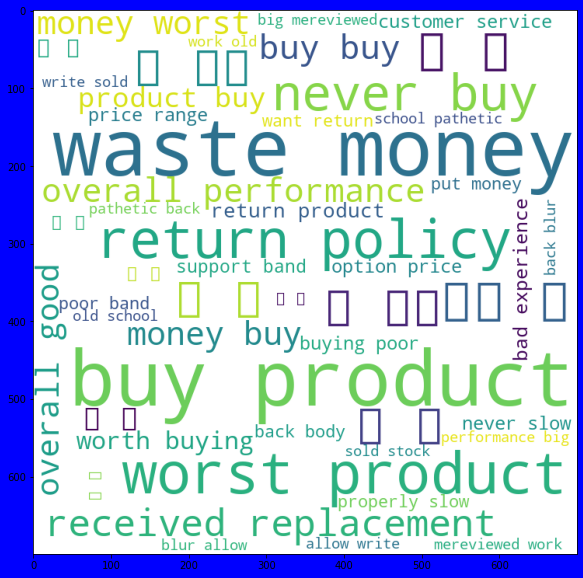

For rating 2 word cloud is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

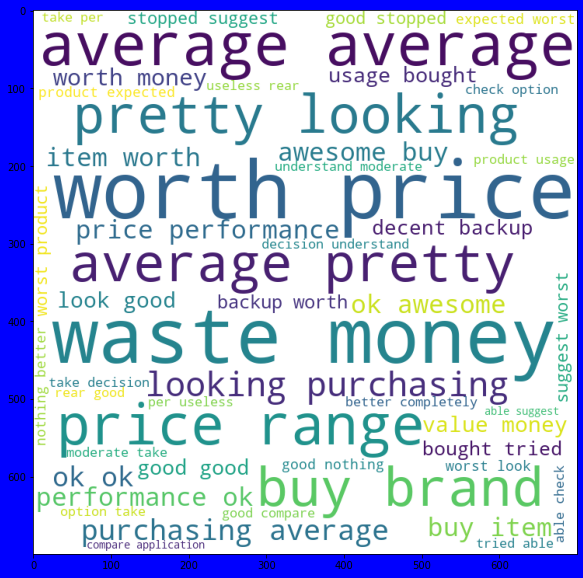

For rating 3 word cloud is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

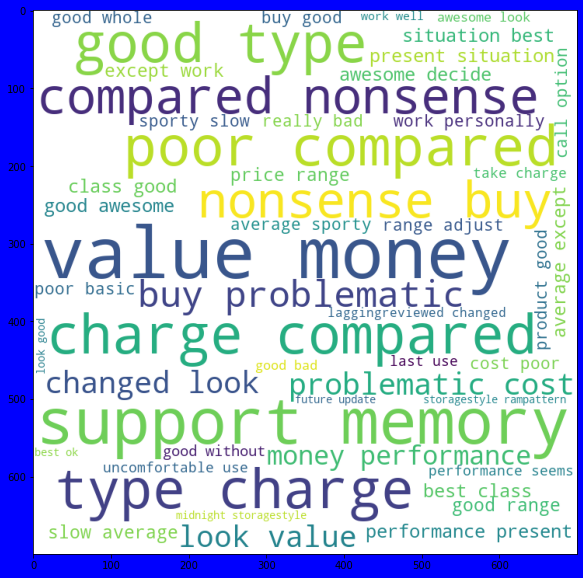

For rating 4 word cloud is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

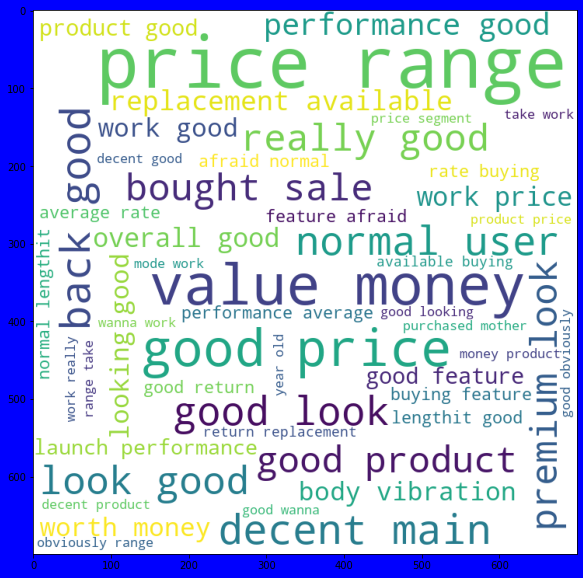

For rating 5 word cloud is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

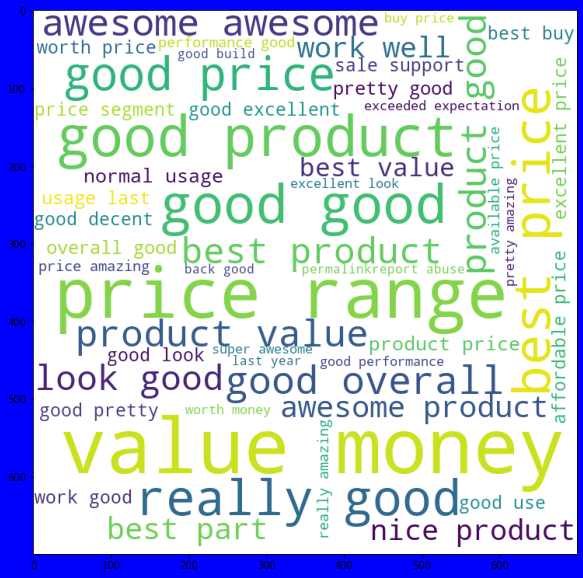

In [27]:
# Generating Key words through word cloud
from wordcloud import WordCloud
for i in range(1,6):
    print(f'For rating {i} word cloud is:')
    spam = df['lemm_desc'][df['Rating']==i]
    spam_cloud = WordCloud(width =700, height = 700, background_color = 'white',max_words = 50).generate(' '.join(spam))
    plt.figure(figsize=(10,10), facecolor = 'b')
    plt.imshow(spam_cloud)
    plt.show()

In [28]:
df['C_len']= df['lemm_desc'].str.len()# lenth of each string

df

Unnamed: 0                                               Desc  Rating  \
0               4  the laptop is great but the seller is intentio...       1   
1              15  super slow laptop don t buy this laptop it tak...       1   
2              24  worst service from amazon and the seller after...       1   
3              27  this is very bad product from amazon there is ...       1   
4              28                                      sound problem       1   
...           ...                                                ...     ...   
86538        6317  quality product and worth the costreviewed in ...       5   
86539        6319  there is a new brand in town really goodreview...       5   
86540        6320  excellent performance by aayush bhowmick on oc...       5   
86541        6321  value for money nice watchreviewed in india on...       5   
86542        6324  really worth may be more worth for what you pa...       5   

          len                                          lemm_desc  C_len  
0       312.0  seller intentionally misleading regarding type...     92  
1       202.0  super slow buy take boot application work slow...     63  
2       405.0  worst service seller buying suitable wanted re...    118  
3       138.0  bad product bill want complete solution regarding     49  
4        15.0                                                         0  
...       ...                                                ...    ...  
86538  2255.0  product worth ordered delivered booking wait a...    594  
86539   728.0  brand town really active seems like industry b...    165  
86540  1908.0  excellent performance using say best good perf...    239  
86541   615.0  value money nice product absolutely value mone...    134  
86542  1237.0  really worth worth pay regret available experi...    329  

[86543 rows x 6 columns]

In [29]:
df['lemm_desc'].str.split(' ',expand=True) # Different words in Desc feature

0              1           2          3           4    \
0         seller  intentionally  misleading  regarding        type   
1          super           slow         buy       take        boot   
2          worst        service      seller     buying    suitable   
3            bad        product        bill       want    complete   
4                          None        None       None        None   
...          ...            ...         ...        ...         ...   
86538    product          worth     ordered  delivered     booking   
86539      brand           town      really     active       seems   
86540  excellent    performance       using        say        best   
86541      value          money        nice    product  absolutely   
86542     really          worth       worth        pay      regret   

               5            6         7         8            9    ...   806  \
0           washed          bad   viewing     angle      mention  ...  None   
1      application         work      slow      poor  performance  ...  None   
2           wanted       return  surprise    return         next  ...  None   
3         solution    regarding      None      None         None  ...  None   
4             None         None      None      None         None  ...  None   
...            ...          ...       ...       ...          ...  ...   ...   
86538         wait       approx      week      band         cost  ...  None   
86539         like     industry    better   product     positive  ...  None   
86540         good  performance      show  accurate      reading  ...  None   
86541        value        money     using      till         good  ...  None   
86542    available   experience    friend     using      product  ...  None   

        807   808   809   810   811   812   813   814   815  
0      None  None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
86538  None  None  None  None  None  None  None  None  None  
86539  None  None  None  None  None  None  None  None  None  
86540  None  None  None  None  None  None  None  None  None  
86541  None  None  None  None  None  None  None  None  None  
86542  None  None  None  None  None  None  None  None  None  

[86543 rows x 816 columns]

In [30]:
# Total data removed
print('origin_length =', df.len.sum())
print('cleaned_length =', df.C_len.sum())
print('% change = ',(df.len.sum()-df.C_len.sum())/df.len.sum() )

origin_length = 79337394.0
cleaned_length = 13697765
% change =  0.8273479338129004


In [31]:
# 83% Data is cleaned

In [32]:
# Checking statistical pattern
df.describe(include='all')

Unnamed: 0                                               Desc  \
count   86543.000000                                              86543   
unique           NaN                                               2995   
top              NaN  slow performance by bosky on march the phone h...   
freq             NaN                                                447   
mean     8050.855621                                                NaN   
std      8975.198932                                                NaN   
min         0.000000                                                NaN   
25%      1540.000000                                                NaN   
50%      3811.000000                                                NaN   
75%     11960.500000                                                NaN   
max     32719.000000                                                NaN   

              Rating           len lemm_desc         C_len  
count   86543.000000  86543.000000     86543  86543.000000  
unique           NaN           NaN      2935           NaN  
top              NaN           NaN      like           NaN  
freq             NaN           NaN       457           NaN  
mean        3.266099    916.739586       NaN    158.276984  
std         1.733228   1143.629953       NaN    197.108855  
min         1.000000      4.000000       NaN      0.000000  
25%         1.000000    373.000000       NaN     56.000000  
50%         4.000000    622.000000       NaN    100.000000  
75%         5.000000   1022.000000       NaN    189.000000  
max         5.000000  19501.000000       NaN   5547.000000

For Rating 1 distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

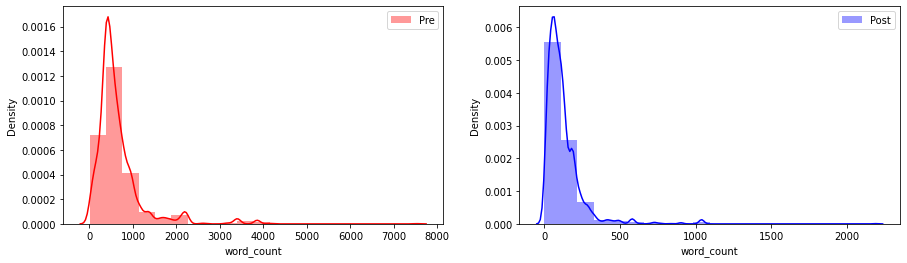

For Rating 2 distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

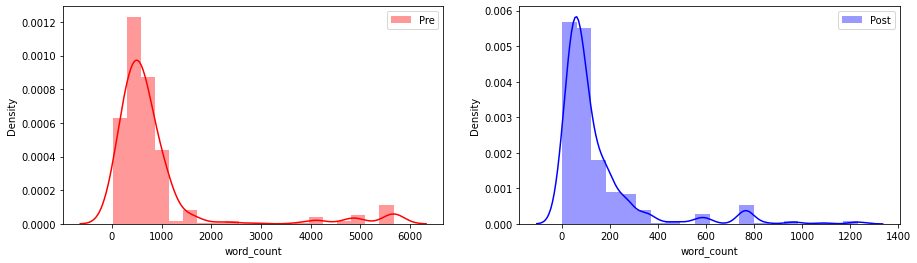

For Rating 3 distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

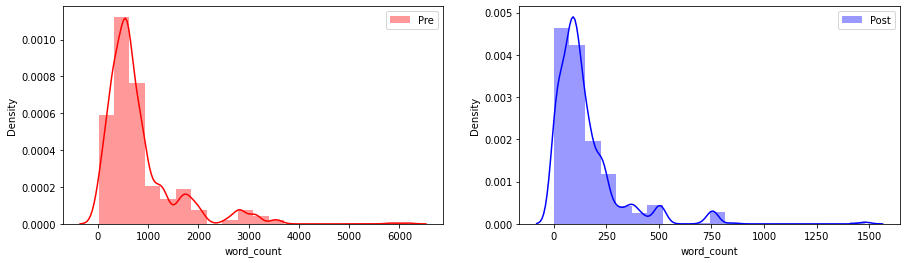

For Rating 4 distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

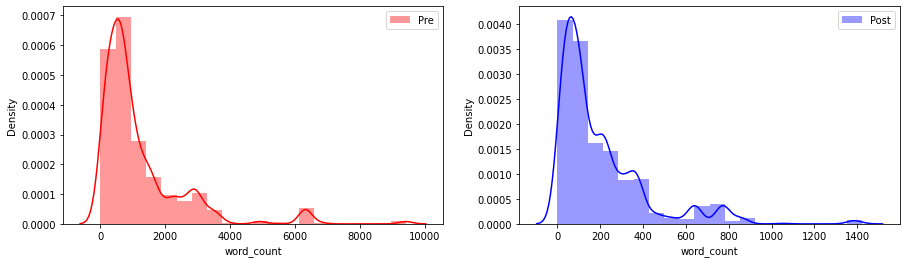

For Rating 5 distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

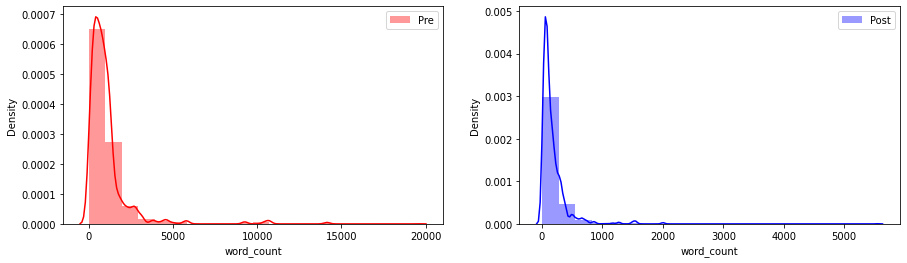

In [33]:
# Distribution plot before and after data cleaning
rating =[1,2,3,4,5]
for i in rating:
    print(f'For Rating {i} distribution is:')
    f,ax = plt.subplots(1,2,figsize=(15,4))
    sns.distplot(df[df['Rating']==i]['len'],bins=20,ax=ax[0],label='Pre',color='r')
    ax[0].set_xlabel('word_count')
    ax[0].legend()
    sns.distplot(df[df['Rating']==i]['C_len'],bins=20,ax=ax[1],label='Post',color='b')
    ax[1].set_xlabel('word_count')
    ax[1].legend()
    plt.show()

word count distribution shows right sided tail.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Box plot of Features'}, xlabel='C_len', ylabel='Count'>

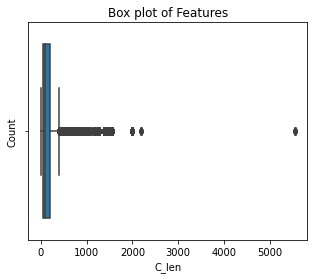

In [34]:
### Box Plot
plt.figure(figsize=(5,4))
plt.title('Box plot of Features')
plt.ylabel('Count')
plt.xlabel('Features')

display(sns.boxplot(df['C_len']))

In [35]:
df.dropna(inplace=True) # drop all null values
df.drop('Unnamed: 0',axis=1,inplace=True) # drop Unnamed: 0
df.columns

Index(['Desc', 'Rating', 'len', 'lemm_desc', 'C_len'], dtype='object')

In [36]:
# Model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost
from sklearn.decomposition import TruncatedSVD

In [40]:
tf_vec = TfidfVectorizer()
x = tf_vec.fit_transform(df['lemm_desc'])
y=df['Rating']
print(x.shape)
print(y.shape)

(86543, 5601)
(86543,)


In [41]:
tf_vec.get_feature_names()

['ability',
 'able',
 'abnormal',
 'abover',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'abstain',
 'abuse',
 'abused',
 'academic',
 'accelerometer',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accidently',
 'acclaimed',
 'accommodate',
 'accomodate',
 'according',
 'accordingly',
 'account',
 'accounting',
 'accross',
 'acctullly',
 'accumulation',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieving',
 'acknowledge',
 'acknowledgement',
 'acknowledging',
 'acoustic',
 'acrobat',
 'across',
 'act',
 'action',
 'activate',
 'activated',
 'activates',
 'activating',
 'activation',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'acurate',
 'adapt',
 'adapter',
 'adapting',
 'adaptive',
 'adaptor',
 'add',
 'added',
 'addict',
 'addictive',
 'adding',
 'addition',
 'addit

In [42]:
#Identifying best random state

best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state = i, stratify = y)
    svc =MultinomialNB()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 91.4322029002253% best random state is 90


In [43]:
#Identifying best algorith with the identified random state
list=[RandomForestClassifier(), SVC(), MultinomialNB()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 90, stratify = y)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between accuracy score & cv score = {round((accuracy_score(y_test,pred)*100)-(cv_score*100))}\n')

KeyboardInterrupt: 

We can see that SVC is performing good with the dataset

In [42]:
# Hyperparameter tuning for randon forest classifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = best_r_state, stratify = y)
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],'class_weight':['dict','balanced'],
             'decision_function_shape':['ovo','ovr']}
clf=GridSearchCV(SVC(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'linear'}

In [ ]:
tf_vec = TfidfVectorizer()
x = tf_vec.fit_transform(df['lemm_desc'])
y=df['Rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state = 90, stratify = y)
RFC =SVC(class_weight= 'balanced',decision_function_shape='ovo',gamma='scale',kernel='linear')
#RFC = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features='log2')
RFC.fit(x_train,y_train)
predsvc = RFC.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predsvc))
print('Cross Validation score=',cross_val_score(RFC,x,y,cv= 10).mean())
print('Confusion Matrix \n',confusion_matrix(y_test,predsvc))
print('classification_report\n',classification_report(y_test,predsvc))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

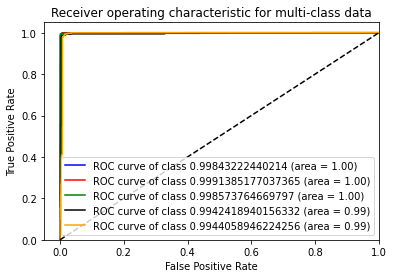

In [33]:
# Redrawing ROC Curve with Label binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=36)

classifier = OneVsRestClassifier(SVC(class_weight= 'balanced',decision_function_shape='ovo',gamma='scale',kernel='linear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','black','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {1} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Saving the model
import joblib
joblib.dump(RFC,'Rating.obj')
rfc_rate = joblib.load('Rating.obj')

In [43]:
# Prediction pipeline & testing
def clean_up(df=None):
    df.dropna(inplace=True) # drop all null values
    df.drop('Unnamed: 0',axis=1,inplace=True) # drop Unnamed: 0
    df_f=df.loc[(df.Rating)==5]
    df_fo=df.loc[(df.Rating)==4]
    df_t=df.loc[(df.Rating)==3]
    df_o=df.loc[(df.Rating)==1]
    df_tw=df.loc[(df.Rating)==2]
    df = pd.concat([df_o,df_tw,df_t,df_fo,df_f], axis =0, ignore_index = True)
    import nltk
    from nltk.tokenize import sent_tokenize
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()

    def lemmatize_text(Desc):
        return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Desc)]


    df['lemm_desc'] = df.Desc.apply(lemmatize_text)
    
    df['lemm_desc'] = [' '.join(map(str, l)) for l in df['lemm_desc']]
    
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'^.+@[^\.]\.[a-z]{z,}$' , " ") # Removing any email symbols
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$' , " ") # Removing any website symbols
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'\u20B9|\$' , " ") # Removing any currency symbols
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'\d+(\.\d+)?' , " ") # Removing any digits symbols
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'[^\w\d\s]' , " ") # Removing any punctuations
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'\s+' , " ") # Removing any whitespaces
    df['lemm_desc'] = df['lemm_desc'].str.replace(r'^\s+|\s+?$' , " ") # Removing any leading & trailing white spaces
    # Removing stopwords
    import string
    import nltk
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('English') + stplist)
    df['lemm_desc'] = df['lemm_desc'].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))


    from sklearn.feature_extraction.text import TfidfVectorizer
    tf_vec = TfidfVectorizer()
    x = tf_vec.fit_transform(df['lemm_desc'])
    rfc_rate = joblib.load('Rating.obj')
    df=pd.DataFrame(rfc_rate.predict(x))
    return(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.19304141257586513

In [ ]:
# Test Data
df_5 = pd.read_csv('Professional_Cameras_data.csv')
df_6 = pd.read_csv('monitors_data.csv')
df_7 = pd.read_csv('Printers_data.csv')
df_8 = pd.read_csv('router_data.csv')
df = pd.concat([df_5,df_6,df_7,df_8], axis =0, ignore_index = True)
df_p = clean_up(df=df)
df_p.columns = ['predicted']
accuracy_score(df['Rating'][0:69037],df_p['predicted'])